In [308]:
# import des librairies dont nous aurons besoin

# Général
import pandas as pd
import numpy as np
import re

# Graphiques
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import FuncFormatter
import seaborn as sns
sns.set()

# Stats
from scipy.stats import chi2_contingency
import scipy.stats as st

# Impact encoding
from category_encoders import TargetEncoder

# ML
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
#from sklearn.preprocessing import OneHotEncoder

# Dimensionnement de l'affichage du dataframe
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)


In [309]:
%matplotlib inline

In [310]:
# Import de fonctions de nettoyage depuis module:
from cleaning57 import na_rows_list, na_raw_drop_df, min_row_data_rate_list, min_row_data_rate_df, column_data_rate, column_data_rate_mean, columns_not_in_list, columns_delete_df, min_column_data_rate_df, low_outlier_filter_df, high_outlier_filter_df, dic_high_outlier_filter_df, word_column_filter_df, word_column_filter_lst, sign_invert_filter_df 

In [311]:
# Import de fonctions graphiques depuis module:
from plotting02 import bi_joint_plot

In [312]:
# Import de fonctions de Machine Learning depuis module:
from ML20 import OneHotEncoder, label_encoding_transform_with_merge, target_encoding_transform_with_merge, vector_encoding_transform_with_merge, encoding_transform_with_merge

# LECTURE DES DONNEES

## Chargement du dataset 2015

In [313]:
# chargement et affichage des données
data_seattle_2015 = pd.read_csv('projets\\04_seattle_building_energy\\2015_building_energy_benchmarking.csv',sep=',',dtype='object')

print(data_seattle_2015.head())

  OSEBuildingID DataYear          BuildingType        PrimaryPropertyType  \
0         21548     2015  Multifamily LR (1-4)       Low-Rise Multifamily   
1         26379     2015        NonResidential                      Hotel   
2         26713     2015  Multifamily HR (10+)      High-Rise Multifamily   
3           102     2015        NonResidential                      Hotel   
4           503     2015        NonResidential  Supermarket/Grocery Store   

             PropertyName TaxParcelIdentificationNumber  \
0        PUGET VISTA APTS                    1992200030   
1         GEORGETOWN  INN                    6920700025   
2          QUINTESSA APTS                    5247800955   
3  MARRIOTT RESIDENCE INN                    1984200065   
4        RESTAURANT DEPOT                    1824049003   

                                            Location CouncilDistrictCode  \
0  411 W REPUBLICAN ST\nSEATTLE, WA 98119\n(47.62...                   7   
1  6100 CORSON AVE S\nSEATTLE,

## Chargement du dataset 2016

In [314]:
# chargement et affichage des données
data_seattle_2016 = pd.read_csv('projets\\04_seattle_building_energy\\2016_building_energy_benchmarking.csv',sep=',',dtype='object')

data_seattle_2016

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101,0659000030,7,DOWNTOWN,47.6122,-122.33799,1927,1,12,88434,0,88434,Hotel,Hotel,88434,NaN,NaN,NaN,NaN,NaN,60,81.69999695,84.30000305,182.5,189,7226362.5,7456910,2003882,1156514.25,3946027,12764.5293,1276453,false,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880,Parking,15064,Restaurant,4622,NaN,61,94.80000305,97.90000153,176.1000061,179.3999939,8387933,8664479,0,950425.1875,3242851,51450.81641,5145082,false,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101,0659000475,7,DOWNTOWN,47.61393,-122.3381,1969,1,41,956110,196718,759392,Hotel,Hotel,756493,NaN,NaN,NaN,NaN,NaN,43,96,97.69999695,241.8999939,244.1000061,72587024,73937112,21566554,14515435,49526664,14938,1493800,false,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1,10,61320,0,61320,Hotel,Hotel,61320,NaN,NaN,NaN,NaN,NaN,56,110.8000031,113.3000031,216.1999969,224,6794584,6946800.5,2214446.25,811525.3125,2768924,18112.13086,1811213,false,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445,Parking,68009,Swimming Pool,0,NaN,75,114.8000031,118.6999969,211.3999939,215.6000061,14172606,14656503,0,1573448.625,5368607,88039.98438,8803998,false,NaN,Compliant,NaN,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,2016,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,Seattle,WA,NaN,1624049080,2,GREATER DUWAMISH,47.56722,-122.31154,1990,1,1,12294,0,12294,Office,Office,12294,NaN,NaN,NaN,NaN,NaN,46,69.09999847,76.69999695,161.6999969,176.1000061,849745.6875,943003.1875,0,153655,524270.86,3254.750244,325475.0244,true,NaN,Error - Correct Default Data,NaN,20.94,1.7
3372,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,Seattle,WA,NaN,3558300000,2,DOWNTOWN,47.59625,-122.32283,2004,1,1,16000,0,16000,Other - Recreation,Other - Recreation,16000,NaN,NaN,NaN,NaN,NaN,NaN,59.40000153,65.90000153,114.1999969,118.9000015,950276.1875,1053705.75,0,116221,396546.052,5537.299805,553729.9805,false,NaN,Compliant,NaN,32.17,2.01
3373,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,Seattle,WA,NaN,1794501150,7,MAGNOLIA / QUEEN ANNE,47.63644,-122.35784,1974,1,1,13157,0,13157,"Fitness Center/Health Club/Gym, Other - Recrea...",Other - Recreation,7583,Fitness Center/Health Club/Gym,5574,Swimming Pool,0,NaN,NaN,438.2000122,460.1000061,744.7999878,767.7999878,5765898,6053764.5,0,525251.6875,1792158.758,39737.39063,3973739.063,false,NaN,Compliant,NaN,223.54,16.99
3374,50225,2016,Nonresidential COS,Mixed Use

## Chargement du dataset 2017

In [315]:
# chargement et affichage des données
data_seattle_2017 = pd.read_csv('projets\\04_seattle_building_energy\\2017_building_energy_benchmarking.csv',sep=',',dtype='object')

data_seattle_2017

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,DefaultData,ComplianceStatus,Outlier
0,1,2017,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101,0659000030,7,DOWNTOWN,47.6122,-122.33799,1927,1,12,88434,0,88434,Hotel,Hotel,88434,NaN,NaN,NaN,NaN,NaN,63,83.20,82.30,184.40,181.60,7361655,7274452.5,2122835.75,1157783.125,3950356.0225,12884.63,1288462.99,197.63,2.235,N,Compliant,NaN
1,2,2017,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880,Parking,15064,Restaurant,4622,NaN,72,88.20,86.80,163.80,159.80,7804844.5,7678810.5,NaN,884161,3016757.332,47880.87,4788086.72,266.78,2.576,N,Compliant,NaN
2,3,2017,Campus,Hotel,84SC9-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101,0659000475,7,DOWNTOWN,47.61393,-122.3381,1969,1,41,956110,196718,759392,"Hotel, Parking, Swimming Pool",Hotel,756493,Parking,138635,Swimming Pool,0,NaN,48,98.40,98.20,242.90,242.60,74470328,74311368,24313482,14276917,48712840.804,14440.00,1444000.10,1570.75,1.643,N,Compliant,NaN
3,5,2017,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,SEATTLE,WA,98101,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1,10,61320,0,61320,Hotel,Hotel,61320,NaN,NaN,NaN,NaN,NaN,51,120.20,119.00,234.30,230.30,7372221.5,7294312,2228119.5,881744.875,3008513.5135,21355.88,2135587.89,244.32,3.984,N,Compliant,NaN
4,8,2017,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445,Parking,68009,Swimming Pool,0,NaN,78,116.10,114.10,209.90,205.50,14335778,14081251,NaN,1523505.75,5198201.619,91375.76,9137575.78,506.80,2.886,N,Compliant,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3456,50265,2017,Multifamily LR (1-4),NaN,NaN,1861 16TH AVE,SEATTLE,WA,NaN,8080400145,1,EAST,47.61826,-122.31184,1906,NaN,4,39984,9234,30750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.000,N,Compliant,NaN
3457,50268,2017,Multifamily MR (5-9),Mid-Rise Multifamily,Decibel Apartments,301 12th Ave,Seattle,WA,98122,2197600742,3,EAST,47.60451,-122.31711,2016,1,7,69656,8477,61179,"Multifamily Housing, Parking",Multifamily,71695,Parking,5651,NaN,NaN,NaN,100,18.80,18.80,36.50,36.50,1349080.5,1349080.5,NaN,168246.59375,574057.377875,7750.23,775022.95,43.54,0.625,N,Compliant,NaN
3458,50272,2017,Multifamily MR (5-9),Mid-Rise Multifamily,Mad Flats,1523 E. Madison Street,Seattle,WA,98122,7234600220,3,CENTRAL,47.61469,-122.31171,2015,1,6,20838,0,20838,Multifamily Housing,Multifamily,16517,NaN,NaN,NaN,NaN,NaN,100,54.60,54.70,121.00,121.00,902482.875,902777.125,NaN,147270.203125,502485.9330625,3999.97,399997.00,23.32,1.119,N,Compliant,NaN
3459,50284,2017,Multifamily MR (5-9),Mid-Rise Multifamily,Vive,1516 NW 51st St,Seattle,WA,98107,2767701650,6,BALLARD,47.66601,-122.37725,2015,1,6,67505,9930,57575,"Multifamily Housing, Parking",Multifamily,46680,Parking,38,NaN,NaN,NaN,75,39.40,NaN,123.00,NaN,1837726.625,NaN,NaN,534436.875,1823498.6175,NaN,NaN,7.54,0.112,N,Compliant,NaN


## Chargement du dataset 2018

In [316]:
# chargement et affichage des données
data_seattle_2018 = pd.read_csv('projets\\04_seattle_building_energy\\2018_building_energy_benchmarking.csv',sep=',',dtype='object')

data_seattle_2018

,OSEBuildingID,DataYear,BuildingName,BuildingType,TaxParcelIdentificationNumber,Address,City,State,ZipCode,Latitude,Longitude,Neighborhood,CouncilDistrictCode,YearBuilt,NumberofFloors,NumberofBuildings,PropertyGFATotal,PropertyGFABuilding(s),PropertyGFAParking,PrimaryPropertyType,ENERGYSTARScore,SiteEUIWN(kBtu/sf),SiteEUI(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SourceEUIWN(kBtu/sf),SourceEUI(kBtu/sf),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),SteamUse(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,ComplianceStatus,ComplianceIssue
0,1,2018,MAYFLOWER PARK HOTEL,NonResidential,0659000030,405 OLIVE WAY,SEATTLE,WA,98101,47.6122,-122.33799,DOWNTOWN,1,1927,12,0,88434,88434,0,Hotel,60,84.40,83.80,7465990,7408290,170.10,168.90,Hotel,88434,NaN,NaN,NaN,NaN,1145355,3907951,14101,1410145,2090193,196.4,2.2,Compliant,No Issue
1,2,2018,PARAMOUNT HOTEL,NonResidential,0659000220,724 PINE ST,SEATTLE,WA,98101,47.61317,-122.33393,DOWNTOWN,1,1996,11,1,103566,88502,15064,Hotel,71,90.00,89.20,7962964,7897345,151.20,150.40,Hotel,83880,Parking,15064,Restaurant,4622,840157,2866615,50307,5030730,0,274.8,3.1,Compliant,No Issue
2,3,2018,WESTIN HOTEL (Parent Building),NonResidential,0659000475,1900 5TH AVE,SEATTLE,WA,98101,47.61393,-122.3381,DOWNTOWN,1,1969,41,3,956110,759392,196718,Hotel,64,89.00,88.20,67336376,66755536,200.60,199.70,Hotel,756493,Parking,138635,Swimming Pool,0,13028620,44453651,14503,1450300,20851598,1304.2,1.7,Compliant,No Issue
3,5,2018,HOTEL MAX,NonResidential,0659000640,620 STEWART ST,SEATTLE,WA,98101,47.61412,-122.33664,DOWNTOWN,7,1926,10,0,61320,61320,0,Hotel,39,121.10,120.00,7426193,7360236,209.00,206.00,Hotel,61320,NaN,NaN,NaN,NaN,769653,2626057,27306,2730608,2003570,258.5,4.2,Compliant,No Issue
4,8,2018,WARWICK SEATTLE HOTEL,NonResidential,0659000970,401 LENORA ST,SEATTLE,WA,98121,47.61375,-122.34047,DOWNTOWN,1,1980,18,0,175580,113580,62000,Hotel,81,107.40,106.40,13261917,13134094,179.60,179.10,Hotel,123445,Parking,68009,Swimming Pool,0,1392492,4751183,83829,8382912,0,457.9,4,Compliant,No Issue
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7069,50414,2018,OTHELLO NORTH,Multifamily MR (5-9),8800000035,4200 S OTHELLO ST,SEATTLE,WA,98118,47.53771,-122.28039,SOUTHEAST,1,2016,7,2,381161,328779,52382,Multifamily Housing,98,39.10,39.10,4809630,4809630,71.30,71.30,Multifamily Housing,123138,Parking,0,NaN,NaN,625138,2132970,26767,2676660,0,147.9,0.4,Compliant,No Issue
7070,50415,2018,PORT OF SEATTLE- TERMINAL 115 (CAMPUS),Campus,5367202505,6000 WEST MARGINAL WAY SW,SEATTLE,WA,98106,47.54657,-122.34109,SHARED: GREATER DUWAMISH &amp; DELRIDGE NEIGHB...,1,1950,4,3,442846,442846,0,Refrigerated Warehouse,NaN,10.90,10.90,5266259,5266259,30.50,30.50,Refrigerated Warehouse,358706,Non-Refrigerated Warehouse,49885,Transportation Terminal/Station,34255,1543452,5266258,0,0,0,14.1,0,Compliant,No Issue
7071,50416,2018,PORT OF SEATTLE- TERMINAL 91 (CAMPUS),Campus,7666201146,2001 W GARFIELD ST,SEATTLE,WA,98119,47.631,-122.38282,MAGNOLIA / QUEEN ANNE,1,2000,4,10,963257,963257,0,Mixed Use Property,NaN,110.20,110.10,76785008,76694304,300.50,300.40,Refrigerated Warehouse,294293,Manufacturing/Industrial Plant,176214,Transportation Terminal/Station,143000,21549590,73527201,31671,3167104,0,364.5,0.4,Compliant,No Issue
7072,50452,2018,PORT OF SEATTLE - TERMINAL 5 CAMPUS,Campus,7666705565,3443 WEST MARGINAL WAY SW,SEATTLE,WA,98106,47.5725,-122.36306,SOUTHWEST,1,1980,4,4,279916,279916,0,Transportation Terminal/Station,NaN,48.90,48.80,13683939,13661870,135.40,135.30,Transportation Terminal/Station,184800,"Repair Services (Vehicle, Shoe, Locksmith, etc)",42444,Office,33420,3939839,13442731,2191,219138,0,47.5,0.2,Compliant,No Issue


## Chargement du dataset 2019

In [317]:
# chargement et affichage des données
data_seattle_2019 = pd.read_csv('projets\\04_seattle_building_energy\\2019_building_energy_benchmarking.csv',sep=',',dtype='object')

data_seattle_2019

,OSEBuildingID,DataYear,BuildingName,BuildingType,TaxParcelIdentificationNumber,Address,City,State,ZipCode,Latitude,Longitude,Neighborhood,CouncilDistrictCode,YearBuilt,NumberofFloors,PropertyGFATotal,PropertyGFABuilding(s),PropertyGFAParking,PrimaryPropertyType,ENERGYSTARScore,SiteEUIWN(kBtu/sf),SiteEUI(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SourceEUIWN(kBtu/sf),SourceEUI(kBtu/sf),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,Electricity(kWh),SteamUse(kBtu),NaturalGas(therms),EPAPropertyType,ComplianceStatus,ComplianceIssue,Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
0,1,2019,MAYFLOWER PARK HOTEL,NonResidential,0659000030,405 OLIVE WAY,SEATTLE,WA,98101,47.6122,-122.33799,DOWNTOWN,1,1927,12,88434,88434,0,Hotel,62,83.30,83.10,7363218,7351864,167.60,167.60,Hotel,88434,NaN,NaN,NaN,NaN,1134817,2159078,13208,Hotel,Compliant,No Issue,3871996,1320791,208.8,2.4
1,2,2019,PARAMOUNT HOTEL,NonResidential,0659000220,724 PINE ST,SEATTLE,WA,98101,47.61317,-122.33393,DOWNTOWN,1,1996,11,103566,88502,15064,Hotel,70,90.90,90.50,8040648,8006404,153.70,153.30,Hotel,83880,Parking,15064,Restaurant,4622,863688,0,50595,Hotel,Compliant,No Issue,2946902,5059502,286.9,3.2
2,3,2019,WESTIN HOTEL (Parent Building),NonResidential,0659000475,1900 5TH AVE,SEATTLE,WA,98101,47.61367,-122.33822,DOWNTOWN,1,1969,41,956110,759392,196718,Hotel,64,90.40,90.00,68355568,68103264,201.50,201.10,Hotel,756493,Parking,138635,Swimming Pool,0,12917890,22601024,14264,Hotel,Compliant,No Issue,44075841,1426400,1549,2
3,5,2019,HOTEL MAX,NonResidential,0659000640,620 STEWART ST,SEATTLE,WA,98101,47.61412,-122.33664,DOWNTOWN,1,1926,10,61320,61320,0,Hotel,58,103.50,103.00,6346838,6319004,177.50,176.30,Hotel,61320,NaN,NaN,NaN,NaN,645119,2104444,20134,Hotel,Compliant,No Issue,2201145,2013415,232.4,3.8
4,8,2019,WARWICK SEATTLE HOTEL,NonResidential,0659000970,401 LENORA ST,SEATTLE,WA,98121,47.61375,-122.34047,DOWNTOWN,1,1980,18,175580,113580,62000,Hotel,63,128.60,128.60,15875107,15875107,212.20,212.20,Hotel,123445,Parking,68009,Swimming Pool,0,1595784,0,104303,Hotel,Compliant,No Issue,5444815,10430292,587.5,5.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3576,50540,2019,EVEN HOTELS & STAYBRIDGE SUITES,NonResidential,1983200540,527 FAIRVIEW AVE N,SEATTLE,WA,98109,47.62403,-122.33485,LAKE UNION,1,2018,9,170885,122668,48217,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,Not Compliant,Portfolio Manager Account Not Shared,0,0,0,0
3577,50542,2019,Aegis Living in Ravenna,NonResidential,5100400245,8511 15TH AVE NE,SEATTLE,WA,98115,47.6905,-122.3132,NORTH,1,2018,3,71461,61429,10032,Senior Care Community,96,35.30,35.30,2236055,2236055,98.80,98.80,Senior Care Community,63360,Parking,8580,NaN,NaN,655350,0,0,Senior Care Community,Compliant,No Issue,2236055,0,13.8,0.2
3578,50543,2019,AEGIS WEST SEATTLE,NonResidential,9276200910,4700 SW ADMIRAL WAY,SEATTLE,WA,98116,47.58099,-122.39305,SOUTHWEST,1,2018,3,78232,67626,10606,Senior Care Community,57,72.10,72.20,4875764,4881406,140.90,141.60,Senior Care Community,67626,Parking,10606,NaN,NaN,744809,0,23401,Senior Care Community,Compliant,No Issue,2541289,2340118,139.9,2.1
3579,50633,2019,BROADWAY ESTATES LLC,Multifamily MR (5-9),6850700510,515 HARVARD AVE E,SEATTLE,WA,98102,47.62366,-122.32229,EAST,1,2014,7,82960,61758,21202,Multifamily Housing,96,31.40,31.40,2350682,2352625,76.50,76.60,Multifamily Housing,74863,NaN,NaN,NaN,NaN,546165,0,4891,Multifamily MR (5-9),Compliant,No Issue,1863514,489112,37.5,0.6


In [318]:
data_seattle_2019['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'Multifamily MR (5-9)',
       'SPS-District K-12', 'Campus', 'Multifamily LR (1-4)',
       'Multifamily HR (10+)', 'Nonresidential WA'], dtype=object)

# CHOIX DU DATAFRAME DE TRAVAIL

Le preprocessing d'encodage de labels est défini en 2015 et sert pour les années suivantes. Ne pas passer la cellule suivante avec remise à jour Kernel (sauf pour 2015)

In [319]:
## Entrez l'année du dataframe à étudier:
year = input("Veuillez entrer l'année du dataframe à étudier: (2015/2016/2017/2018/2019)")

Veuillez entrer l'année du dataframe à étudier: (2015/2016/2017/2018/2019) 2015


In [320]:
## Choix du dataframe à étudier
if int(year) == 2015:    
    data = data_seattle_2015.copy()
if int(year) == 2016:    
    data = data_seattle_2016.copy()
if int(year) == 2017:    
    data = data_seattle_2017.copy()
if int(year) == 2018:    
    data = data_seattle_2018.copy()
if int(year) == 2019:    
    data = data_seattle_2019.copy()

In [321]:
## liste float à partir des variables de 2015
float_characteristics_lst_2015 = ['DataYear','YearBuilt','YearsENERGYSTARCertified',
                                  'OSEBuildingID','TaxParcelIdentificationNumber',
                                  'CouncilDistrictCode','NumberofBuildings',
                                  'NumberofFloors','PropertyGFATotal',
                                  'PropertyGFAParking','PropertyGFABuilding(s)',
                                  'LargestPropertyUseTypeGFA',
                                  'SecondLargestPropertyUseTypeGFA',
                                  'ThirdLargestPropertyUseTypeGFA',
                                  'ENERGYSTARScore']


float_measures_lst_2015 = ['SiteEUI(kBtu/sf)','SiteEUIWN(kBtu/sf)',
                           'SourceEUI(kBtu/sf)','SourceEUIWN(kBtu/sf)',
                           'SiteEnergyUse(kBtu)','SiteEnergyUseWN(kBtu)',
                           'SteamUse(kBtu)','Electricity(kWh)','Electricity(kBtu)',
                           'NaturalGas(therms)','NaturalGas(kBtu)',
                           'OtherFuelUse(kBtu)','GHGEmissions(MetricTonsCO2e)',
                           'GHGEmissionsIntensity(kgCO2e/ft2)']

# Adaptation des variables float en fonction de l'année de travail: 2015/2016/2017/2018/2019

float_characteristics_lst = float_characteristics_lst_2015
float_measures_lst = float_measures_lst_2015

if int(year) == 2015:
     
    data.rename({'GHGEmissionsIntensity(kgCO2e/ft2)': 'GHGEmissionsIntensity', 'GHGEmissions(MetricTonsCO2e)': 'TotalGHGEmissions'}, axis=1, inplace=True)
    
    float_measures_lst.remove('GHGEmissionsIntensity(kgCO2e/ft2)')
    float_measures_lst.remove('GHGEmissions(MetricTonsCO2e)')
    
    float_measures_lst.append('GHGEmissionsIntensity')
    float_measures_lst.append('TotalGHGEmissions')
    
if (int(year) == 2016) | (int(year) == 2017) | (int(year) == 2018) |(int(year) == 2019):

    float_measures_lst.remove('GHGEmissionsIntensity(kgCO2e/ft2)')
    float_measures_lst.remove('GHGEmissions(MetricTonsCO2e)')
    
    float_measures_lst.append('GHGEmissionsIntensity')
    float_measures_lst.append('TotalGHGEmissions')
    
    float_measures_lst.remove('OtherFuelUse(kBtu)')

if (int(year) == 2018) | (int(year) == 2019):

    float_characteristics_lst.remove('YearsENERGYSTARCertified')

if (int(year) == 2019):
    float_characteristics_lst.remove('NumberofBuildings')

float_lst = float_characteristics_lst + float_measures_lst

In [322]:
# Détecte les nouvelles entrées par rapport à l'année 2015 modifiée en float:
precedent_lst = ['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'TaxParcelIdentificationNumber', 'Location',
       'CouncilDistrictCode', 'Neighborhood', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'OtherFuelUse(kBtu)', 'TotalGHGEmissions',
       'GHGEmissionsIntensity', 'DefaultData', 'Comment', 'ComplianceStatus',
       'Outlier']

# Création d'une série à partir des colonnes du dataset chargé à l'instant, afin d'utiliser la fonction isin()
#... et comparer à notre liste précédente
current_lst = list(data.columns)
current_serie = pd.Series(current_lst)

# identifions les indices de lignes où les valeurs (colones du dataset actuel) ne sont pas dans notre liste
#...puis mettons sous forme de dataframe:
dframe = pd.DataFrame(np.where(current_serie.isin(precedent_lst) == False))

# Vérifions la taille du dataframe (colonne ajoutée ou non?)
# Le cas où une colonne est en moins est transparent, pas besoin de le prendre
#en compte (le programme ne fonctionnera pas)

# Création d'un dictionnaire avec en clé la nouvelle colonne et en valeur le type d'objet qui va être entré par la suite
dic_colonne_type = {}

if dframe.shape[1] == 0:
    print("Pas de colonnes ajoutées")
if dframe.shape[1] > 0:
    print("ATTENTION, colonne(s) ajouté(es):\n")
    for c in dframe.columns:
        i = dframe[c].iloc[0]
        colonne_ajoutee = current_serie.iloc[i]
        print(f'-> {colonne_ajoutee}')
        print("\n")


Pas de colonnes ajoutées


# INSPECTION DES DONNEES

In [323]:
# Taille du dataframe
data.shape

(3340, 42)

In [324]:
# Taux de remplissage par colonne:
column_data_rate(data)

OSEBuildingID                      1.000000
DataYear                           1.000000
BuildingType                       1.000000
PrimaryPropertyType                1.000000
PropertyName                       1.000000
TaxParcelIdentificationNumber      0.999401
Location                           1.000000
CouncilDistrictCode                1.000000
Neighborhood                       1.000000
YearBuilt                          1.000000
NumberofBuildings                  1.000000
NumberofFloors                     0.997605
PropertyGFATotal                   1.000000
PropertyGFAParking                 1.000000
PropertyGFABuilding(s)             1.000000
ListOfAllPropertyUseTypes          0.961976
LargestPropertyUseType             0.959281
LargestPropertyUseTypeGFA          0.959281
SecondLargestPropertyUseType       0.466766
SecondLargestPropertyUseTypeGFA    0.466766
ThirdLargestPropertyUseType        0.167665
ThirdLargestPropertyUseTypeGFA     0.167665
YearsENERGYSTARCertified        

In [325]:
# Taux de remplissage moyen par colonne:
column_data_rate_mean(data)

0.8555389221556882

In [326]:
# Nombre de bâtiments:
data['OSEBuildingID'].nunique()

3340

Certains noms de quartiers englobent plusieurs numéros de district

# RECHERCHE DE TARGET

## Consommation énergétique - méthode 1

### SourceEUI(kBtu/sf)

Source Energy Use Intensity (EUI) is a property's Source Energy Use divided by its gross floor area. Source Energy Use is the annual energy used to operate the property, including losses from generation, transmission, & distribution. Source EUI is measured in thousands of British thermal units (kBtu) per square foot.


### SourceEUIWN(kBtu/sf)

Weather Normalized (WN) Source Energy Use Intensity (EUI) is a property's WN Source Energy divided by its gross floor area. WN Source Energy is the Source Energy Use the property would have consumed during 30-year average weather conditions. WN Source EUI is measured in measured in thousands of British thermal units (kBtu) per square foot.


## Consommation énergétique - méthode 2

Calcul de la consommation énergétique par type d'énergie

### SteamUse(kBtu)

The annual amount of district steam consumed by the property on-site, measured in thousands of British thermal units (kBtu).


### Electricity(kWh)

The annual amount of electricity consumed by the property on-site, including electricity purchased from the grid and generated by onsite renewable systems, measured in kWh

### NaturalGas(therms)

The annual amount of utility-supplied natural gas consumed by the property, measured in therms.


## Emissions de CO2 - méthode 1

Calcul à partir de la prédiction d'énergie totale. Seulement il manque un coefficient de conversion pour de l'énergie totale à l'empreinte carbone

## Emissions de CO2 - méthode 2

Calcul à partir des prédictions respectives de vapeur/gaz/électricité, à partir des coefficients d'énergie fournis:

The total amount of greenhouse gas emissions, including carbon dioxide, methane, and nitrous oxide gases released into the atmosphere as a result of energy consumption at the property, measured in metric tons of carbon dioxide equivalent. This calculation uses a GHG emissions factor from Seattle CIty Light's portfolio of generating resources. 
- This uses Seattle City Light's 2015 emissions factor of 52.44 lbs CO2e/MWh until the 2016 factor is available.
- Enwave steam factor = 170.17 lbs CO2e/MMBtu.
- Gas factor sourced from EPA Portfolio Manager = 53.11 kg CO2e/MBtu


Quelle est la différence entre "city light" et l'énergie électrique? Se base t'on sur l'énergie totale électrique consommée

# NETTOYAGE DES DONNEES

## Casting

In [327]:
# Vérification du type d'objets:
data.dtypes

OSEBuildingID                      object
DataYear                           object
BuildingType                       object
PrimaryPropertyType                object
PropertyName                       object
TaxParcelIdentificationNumber      object
Location                           object
CouncilDistrictCode                object
Neighborhood                       object
YearBuilt                          object
NumberofBuildings                  object
NumberofFloors                     object
PropertyGFATotal                   object
PropertyGFAParking                 object
PropertyGFABuilding(s)             object
ListOfAllPropertyUseTypes          object
LargestPropertyUseType             object
LargestPropertyUseTypeGFA          object
SecondLargestPropertyUseType       object
SecondLargestPropertyUseTypeGFA    object
ThirdLargestPropertyUseType        object
ThirdLargestPropertyUseTypeGFA     object
YearsENERGYSTARCertified           object
ENERGYSTARScore                   

In [328]:
# Conversion en float
for colonne in float_lst:
    data[colonne] = pd.to_numeric(data[colonne],errors = 'coerce')

In [329]:
data.dtypes

OSEBuildingID                        int64
DataYear                             int64
BuildingType                        object
PrimaryPropertyType                 object
PropertyName                        object
TaxParcelIdentificationNumber      float64
Location                            object
CouncilDistrictCode                  int64
Neighborhood                        object
YearBuilt                            int64
NumberofBuildings                    int64
NumberofFloors                     float64
PropertyGFATotal                     int64
PropertyGFAParking                   int64
PropertyGFABuilding(s)               int64
ListOfAllPropertyUseTypes           object
LargestPropertyUseType              object
LargestPropertyUseTypeGFA          float64
SecondLargestPropertyUseType        object
SecondLargestPropertyUseTypeGFA    float64
ThirdLargestPropertyUseType         object
ThirdLargestPropertyUseTypeGFA     float64
YearsENERGYSTARCertified           float64
ENERGYSTARS

## Recherche des lignes dupliquées

In [330]:
data.duplicated(subset=['OSEBuildingID']).value_counts()

False    3340
dtype: int64

In [331]:
data.drop_duplicates(inplace=True)

In [332]:
data.duplicated(subset=['OSEBuildingID']).value_counts()

False    3340
dtype: int64

## Recherche des valeurs aberrantes

In [333]:
lignes_avant = data.shape[0]

### Valeurs négatives aberrantes

In [334]:
column_data_rate(data)

OSEBuildingID                      1.000000
DataYear                           1.000000
BuildingType                       1.000000
PrimaryPropertyType                1.000000
PropertyName                       1.000000
TaxParcelIdentificationNumber      0.998503
Location                           1.000000
CouncilDistrictCode                1.000000
Neighborhood                       1.000000
YearBuilt                          1.000000
NumberofBuildings                  1.000000
NumberofFloors                     0.997605
PropertyGFATotal                   1.000000
PropertyGFAParking                 1.000000
PropertyGFABuilding(s)             1.000000
ListOfAllPropertyUseTypes          0.961976
LargestPropertyUseType             0.959281
LargestPropertyUseTypeGFA          0.959281
SecondLargestPropertyUseType       0.466766
SecondLargestPropertyUseTypeGFA    0.466766
ThirdLargestPropertyUseType        0.167665
ThirdLargestPropertyUseTypeGFA     0.167665
YearsENERGYSTARCertified        

In [335]:
data[(data[float_lst] < 0).all(1)]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,DefaultData,Comment,ComplianceStatus,Outlier


In [336]:
# Filtre des petites valeurs avant passage au log
low_outlier_filter_df(data, float_lst, 0.0000000001)

Nombre de valeurs aberrantes :

{'DataYear': 0, 'YearBuilt': 0, 'YearsENERGYSTARCertified': 0, 'OSEBuildingID': 0, 'TaxParcelIdentificationNumber': 0, 'CouncilDistrictCode': 0, 'NumberofBuildings': 0, 'NumberofFloors': 5, 'PropertyGFATotal': 0, 'PropertyGFAParking': 2418, 'PropertyGFABuilding(s)': 2, 'LargestPropertyUseTypeGFA': 0, 'SecondLargestPropertyUseTypeGFA': 111, 'ThirdLargestPropertyUseTypeGFA': 44, 'ENERGYSTARScore': 0, 'SiteEUI(kBtu/sf)': 2, 'SiteEUIWN(kBtu/sf)': 12, 'SourceEUI(kBtu/sf)': 3, 'SourceEUIWN(kBtu/sf)': 13, 'SiteEnergyUse(kBtu)': 2, 'SiteEnergyUseWN(kBtu)': 12, 'SteamUse(kBtu)': 3200, 'Electricity(kWh)': 2, 'Electricity(kBtu)': 2, 'NaturalGas(therms)': 1256, 'NaturalGas(kBtu)': 1256, 'OtherFuelUse(kBtu)': 3313, 'GHGEmissionsIntensity': 8, 'TotalGHGEmissions': 2}


ratio de valeurs aberrantes :

{'DataYear': 0.0, 'YearBuilt': 0.0, 'YearsENERGYSTARCertified': 0.0, 'OSEBuildingID': 0.0, 'TaxParcelIdentificationNumber': 0.0, 'CouncilDistrictCode': 0.0, 'NumberofBuild

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,DefaultData,Comment,ComplianceStatus,Outlier
0,21548,2015,Multifamily LR (1-4),Low-Rise Multifamily,PUGET VISTA APTS,1.992200e+09,"411 W REPUBLICAN ST\nSEATTLE, WA 98119\n(47.62...",7,MAGNOLIA / QUEEN ANNE,1967,1,4.0,40086,6133.0,33953.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,Not Compliant,NaN
1,26379,2015,NonResidential,Hotel,GEORGETOWN INN,6.920700e+09,"6100 CORSON AVE S\nSEATTLE, WA 98108\n(47.5477...",2,GREATER DUWAMISH,1992,1,3.0,22452,NaN,22452.0,Hotel,Hotel,22452.0,NaN,NaN,NaN,NaN,NaN,78.0,60.3,61.5,118.2,122.0,1354219.0,1381137.0,NaN,172881.0,589893.0,7644.0,764350.0,NaN,44.71,1.88,No,NaN,Compliant,NaN
2,26713,2015,Multifamily HR (10+),High-Rise Multifamily,QUINTESSA APTS,5.247801e+09,"201 YESLER WAY\nSEATTLE, WA 98104\n(47.6015502...",7,DOWNTOWN,2007,1,13.0,90959,NaN,90959.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,48.0,52.2,115.4,126.2,4361755.0,4748161.0,NaN,829363.0,2829904.0,15320.0,1531968.0,NaN,101.09,0.98,No,NaN,Compliant,NaN
3,102,2015,NonResidential,Hotel,MARRIOTT RESIDENCE INN,1.984200e+09,"800 FAIRVIEW AVE N\nSEATTLE, WA 98109\n(47.626...",3,LAKE UNION,1990,1,7.0,282863,44766.0,238097.0,"Hotel, Parking",Hotel,235788.0,Parking,51537.0,NaN,NaN,NaN,40.0,79.9,85.3,178.1,186.6,18829136.0,20123722.0,NaN,3117920.0,10638785.0,81908.0,8190794.0,NaN,509.18,1.64,No,NaN,Compliant,NaN
4,503,2015,NonResidential,Supermarket/Grocery Store,RESTAURANT DEPOT,1.824049e+09,"3670 E MARGINAL WAY S\nSEATTLE, WA 98134\n(47....",2,GREATER DUWAMISH,2008,1,1.0,63225,NaN,63225.0,Supermarket/Grocery Store,Supermarket/Grocery Store,63225.0,NaN,NaN,NaN,NaN,NaN,100.0,104.7,104.7,328.8,328.8,6619941.0,6619941.0,NaN,1940194.0,6620217.0,NaN,NaN,NaN,46.15,0.28,No,NaN,Compliant,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3335,49739,2015,Multifamily MR (5-9),Mid-Rise Multifamily,WILLIAMS APTS,2.467400e+09,"219 PONTIUS AVE N\nSEATTLE, WA 98109\n(47.6202...",7,LAKE UNION,2013,1,6.0,41502,NaN,41502.0,Multifamily Housing,Multifamily Housing,43186.0,NaN,NaN,NaN,NaN,NaN,82.0,51.8,59.6,98.0,106.3,2236406.0,2574530.0,NaN,264424.0,902251.0,13342.0,1334192.0,NaN,77.15,1.77,No,NaN,Compliant,NaN
3336,44187,2015,Multifamily MR (5-9),Mid-Rise Multifamily,THE DOUGLAS APTS,7.948300e+09,"1223 E CHERRY ST\nSEATTLE, WA 98122\n(47.60784...",3,CENTRAL,2011,1,5.0,140254,19824.0,120430.0,"Multifamily Housing, Parking, Retail Store",Multifamily Housing,108099.0,Parking,18913.0,Retail Store,14975.0,NaN,94.0,35.9,39.0,91.0,97.4,4424263.0,4802821.0,NaN,919143.0,3136246.0,12881.0,1288147.0,NaN,90.28,0.55,No,NaN,Compliant,NaN
3337,50016,2015,Multifamily MR (5-9),Mid-Rise Multifamily,AMLI MARK 24 APTS,2.767701e+09,"2428 NW MARKET ST\nSEATTLE, WA 98107\n(47.6692...",6,BALLARD,2014,1,7.0,418285,129196.0,289089.0,"Multifamily Housing, Parking",Multifamily Housing,418277.0,Parking,127633.0,NaN,NaN,2016.0,100.0,18.3,18.3,47.3,47.3,7641887.0,7641887.0,NaN,1651468.0,5635043.0,20071.0,2007079.0,NaN,145.88,0.29,No,NaN,Compliant,Low Outlier
3338,50033,2015,Multifamily MR (5-9),Mid-Rise Multifamily,COMPASS ON DEXTER APTS,1.991201e+09,"756 JOHN ST\nSEATTLE, WA 98109\n(47.62

In [337]:
column_data_rate(data)

OSEBuildingID                      1.000000
DataYear                           1.000000
BuildingType                       1.000000
PrimaryPropertyType                1.000000
PropertyName                       1.000000
TaxParcelIdentificationNumber      0.998503
Location                           1.000000
CouncilDistrictCode                1.000000
Neighborhood                       1.000000
YearBuilt                          1.000000
NumberofBuildings                  1.000000
NumberofFloors                     0.996108
PropertyGFATotal                   1.000000
PropertyGFAParking                 0.276048
PropertyGFABuilding(s)             0.999401
ListOfAllPropertyUseTypes          0.961976
LargestPropertyUseType             0.959281
LargestPropertyUseTypeGFA          0.959281
SecondLargestPropertyUseType       0.466766
SecondLargestPropertyUseTypeGFA    0.433533
ThirdLargestPropertyUseType        0.167665
ThirdLargestPropertyUseTypeGFA     0.154491
YearsENERGYSTARCertified        

### Valeurs aberrantes EUI

Un travail de nettoyage a déjà été effectué par la ville de Seattle: "Buildings identified as outliers by EUI. Buildings in the lowest or highest one percent by
EUI among major building types were excluded as outliers"

In [338]:
if (int(year) == 2015) | (int(year) == 2016) | (int(year) == 2017):
    #data['Outlier'].unique()
    data = data[data['Outlier'].isna()]
    lignes_apres = data.shape[0]
    
    lignes_supprimees = lignes_avant - lignes_apres
    #lignes_supprimees
    
    print(f'{lignes_supprimees} lignes au total ont été filtrées afin de travailler sur le "cleaned dataset"')
    

84 lignes au total ont été filtrées afin de travailler sur le "cleaned dataset"


### Filtre sur statut 'not compliant'

In [339]:
data = data[data['ComplianceStatus'] == 'Compliant']
lignes_apres = data.shape[0]

In [340]:
lignes_supprimees = lignes_avant - lignes_apres
lignes_supprimees

87

In [341]:
print(f'{lignes_supprimees} lignes au total ont été filtrées afin de travailler sur le "cleaned dataset"')

87 lignes au total ont été filtrées afin de travailler sur le "cleaned dataset"


In [342]:
data.shape[0]

3253

In [343]:
column_data_rate(data)

OSEBuildingID                      1.000000
DataYear                           1.000000
BuildingType                       1.000000
PrimaryPropertyType                1.000000
PropertyName                       1.000000
TaxParcelIdentificationNumber      0.998463
Location                           1.000000
CouncilDistrictCode                1.000000
Neighborhood                       1.000000
YearBuilt                          1.000000
NumberofBuildings                  1.000000
NumberofFloors                     0.996004
PropertyGFATotal                   1.000000
PropertyGFAParking                 0.276668
PropertyGFABuilding(s)             0.999385
ListOfAllPropertyUseTypes          0.962189
LargestPropertyUseType             0.959729
LargestPropertyUseTypeGFA          0.959729
SecondLargestPropertyUseType       0.466031
SecondLargestPropertyUseTypeGFA    0.433139
ThirdLargestPropertyUseType        0.166923
ThirdLargestPropertyUseTypeGFA     0.153704
YearsENERGYSTARCertified        

# DATAVIZ - 01

## Analyses Univariées

In [344]:
# Création d'un dataframe avec les colonnes en float seulement
data_float = data.select_dtypes(include=['float64','int64'])
data_float.shape

(3253, 29)

In [345]:
data.dtypes

OSEBuildingID                        int64
DataYear                             int64
BuildingType                        object
PrimaryPropertyType                 object
PropertyName                        object
TaxParcelIdentificationNumber      float64
Location                            object
CouncilDistrictCode                  int64
Neighborhood                        object
YearBuilt                            int64
NumberofBuildings                    int64
NumberofFloors                     float64
PropertyGFATotal                     int64
PropertyGFAParking                 float64
PropertyGFABuilding(s)             float64
ListOfAllPropertyUseTypes           object
LargestPropertyUseType              object
LargestPropertyUseTypeGFA          float64
SecondLargestPropertyUseType        object
SecondLargestPropertyUseTypeGFA    float64
ThirdLargestPropertyUseType         object
ThirdLargestPropertyUseTypeGFA     float64
YearsENERGYSTARCertified           float64
ENERGYSTARS

In [346]:
X = data_float.values

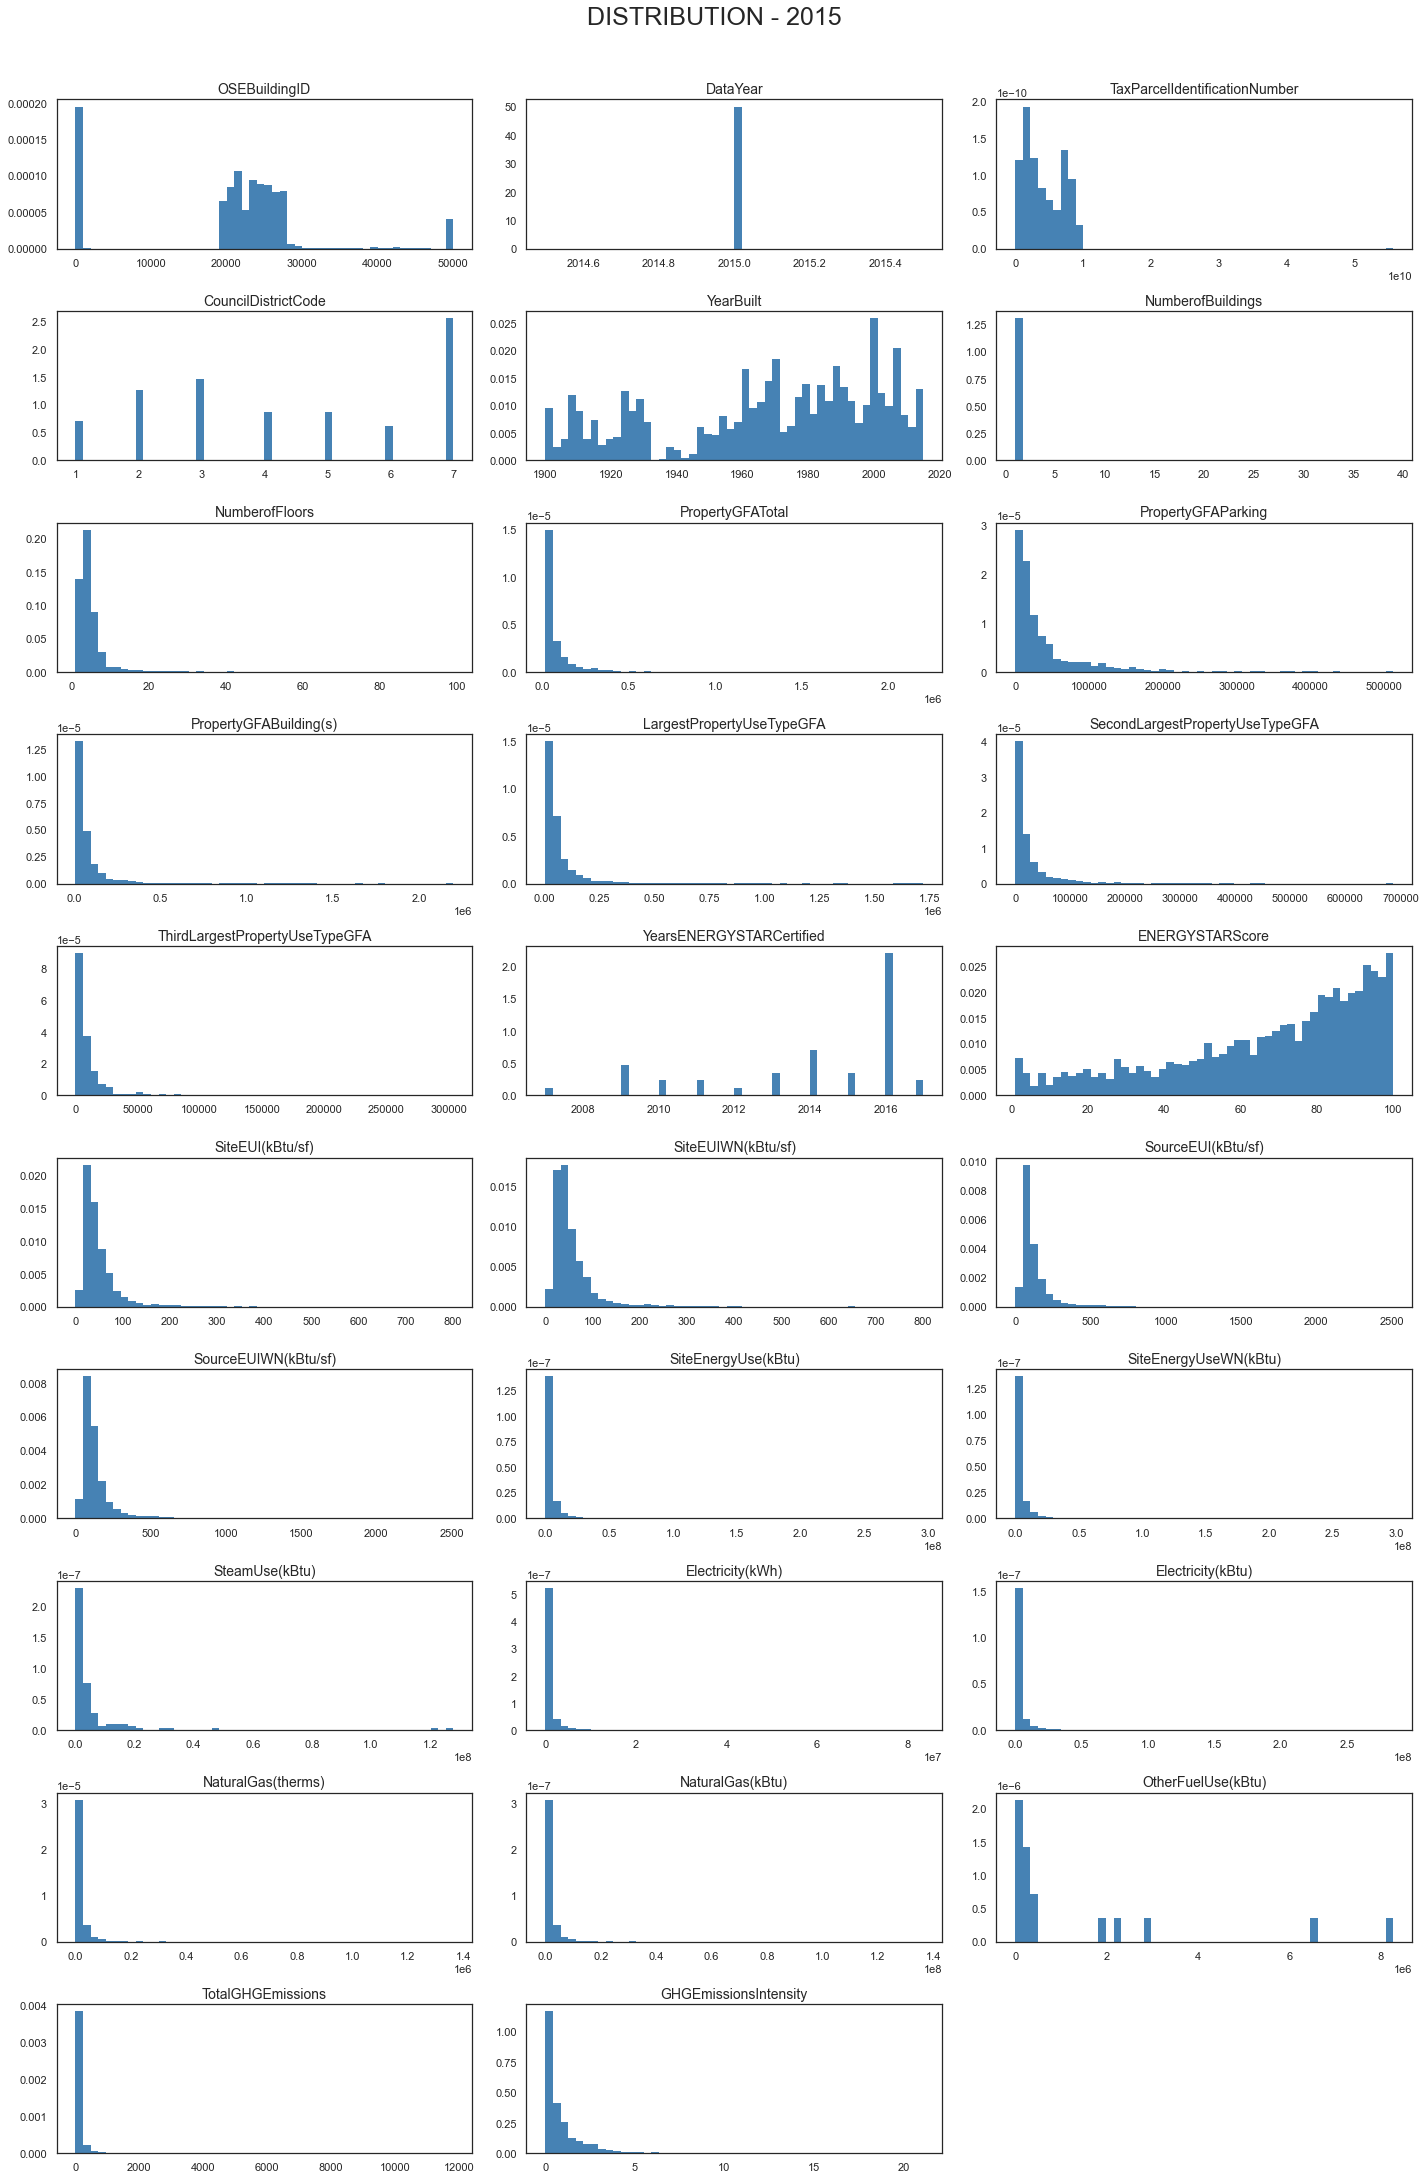

In [347]:
# Plots
fig = plt.figure(figsize=(20,35))
for feat_idx in range(data_float.shape[1]):
    sns.set_theme(style="white")
    ax = fig.add_subplot(12,3, (feat_idx+1))
    h = ax.hist(X[:, feat_idx], bins=50, color = 'steelblue', density=True, edgecolor='none')
    ax.set_title(data_float.columns[feat_idx], fontsize=14)
    
# Titre de la figure:
plt.tight_layout()
fig.suptitle(f"DISTRIBUTION - {year}", fontsize=25, x = 0.5, y = 1.025)

# Sauvegarde
file = int(year)
plt.savefig(f"projets\\04_seattle_building_energy\\production\\savefig\\{file}\\DISTRIBUTION_{file}.png", transparent=True)

## Matrice de corrélation de Pearson

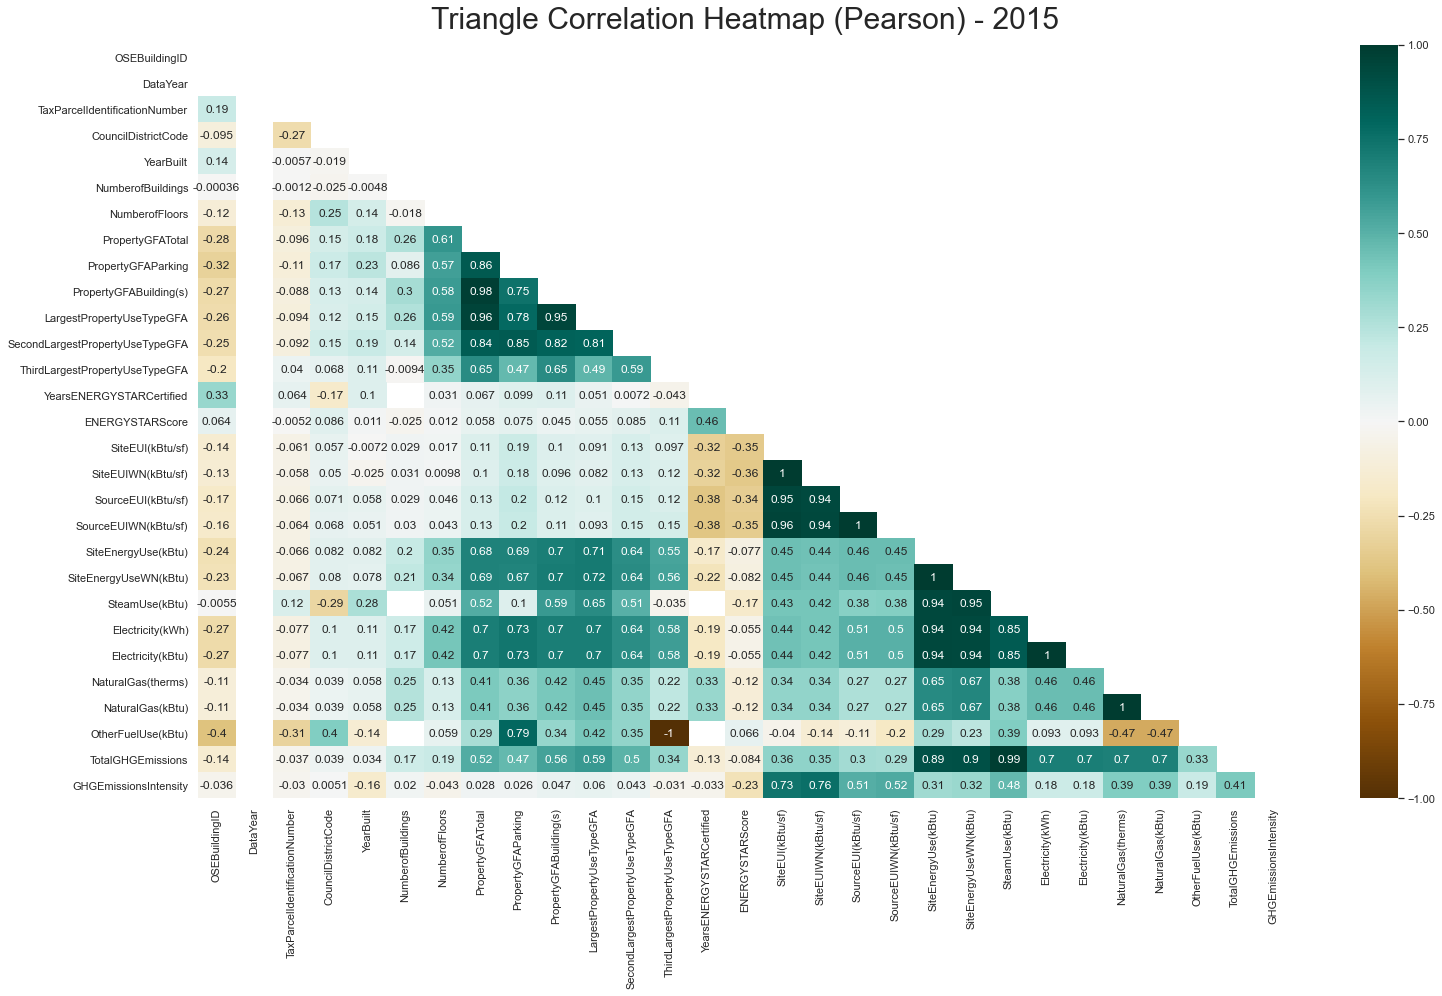

In [348]:
# Heatmap 
plt.figure(figsize=(22, 14))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(data.corr()))
heatmap = sns.heatmap(data.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title(f'Triangle Correlation Heatmap (Pearson) - {year}', fontdict={'fontsize':30}, pad=16);
plt.tight_layout()

fig = heatmap.get_figure()

# Sauvegarde
file = int(year)
plt.savefig(f"projets\\04_seattle_building_energy\\production\\savefig\\{file}\\Heatmap_Pearson_{file}.png", transparent=True)

'SiteEnergyUse(kBtu)' a de fortes corrélations avec les autres variables

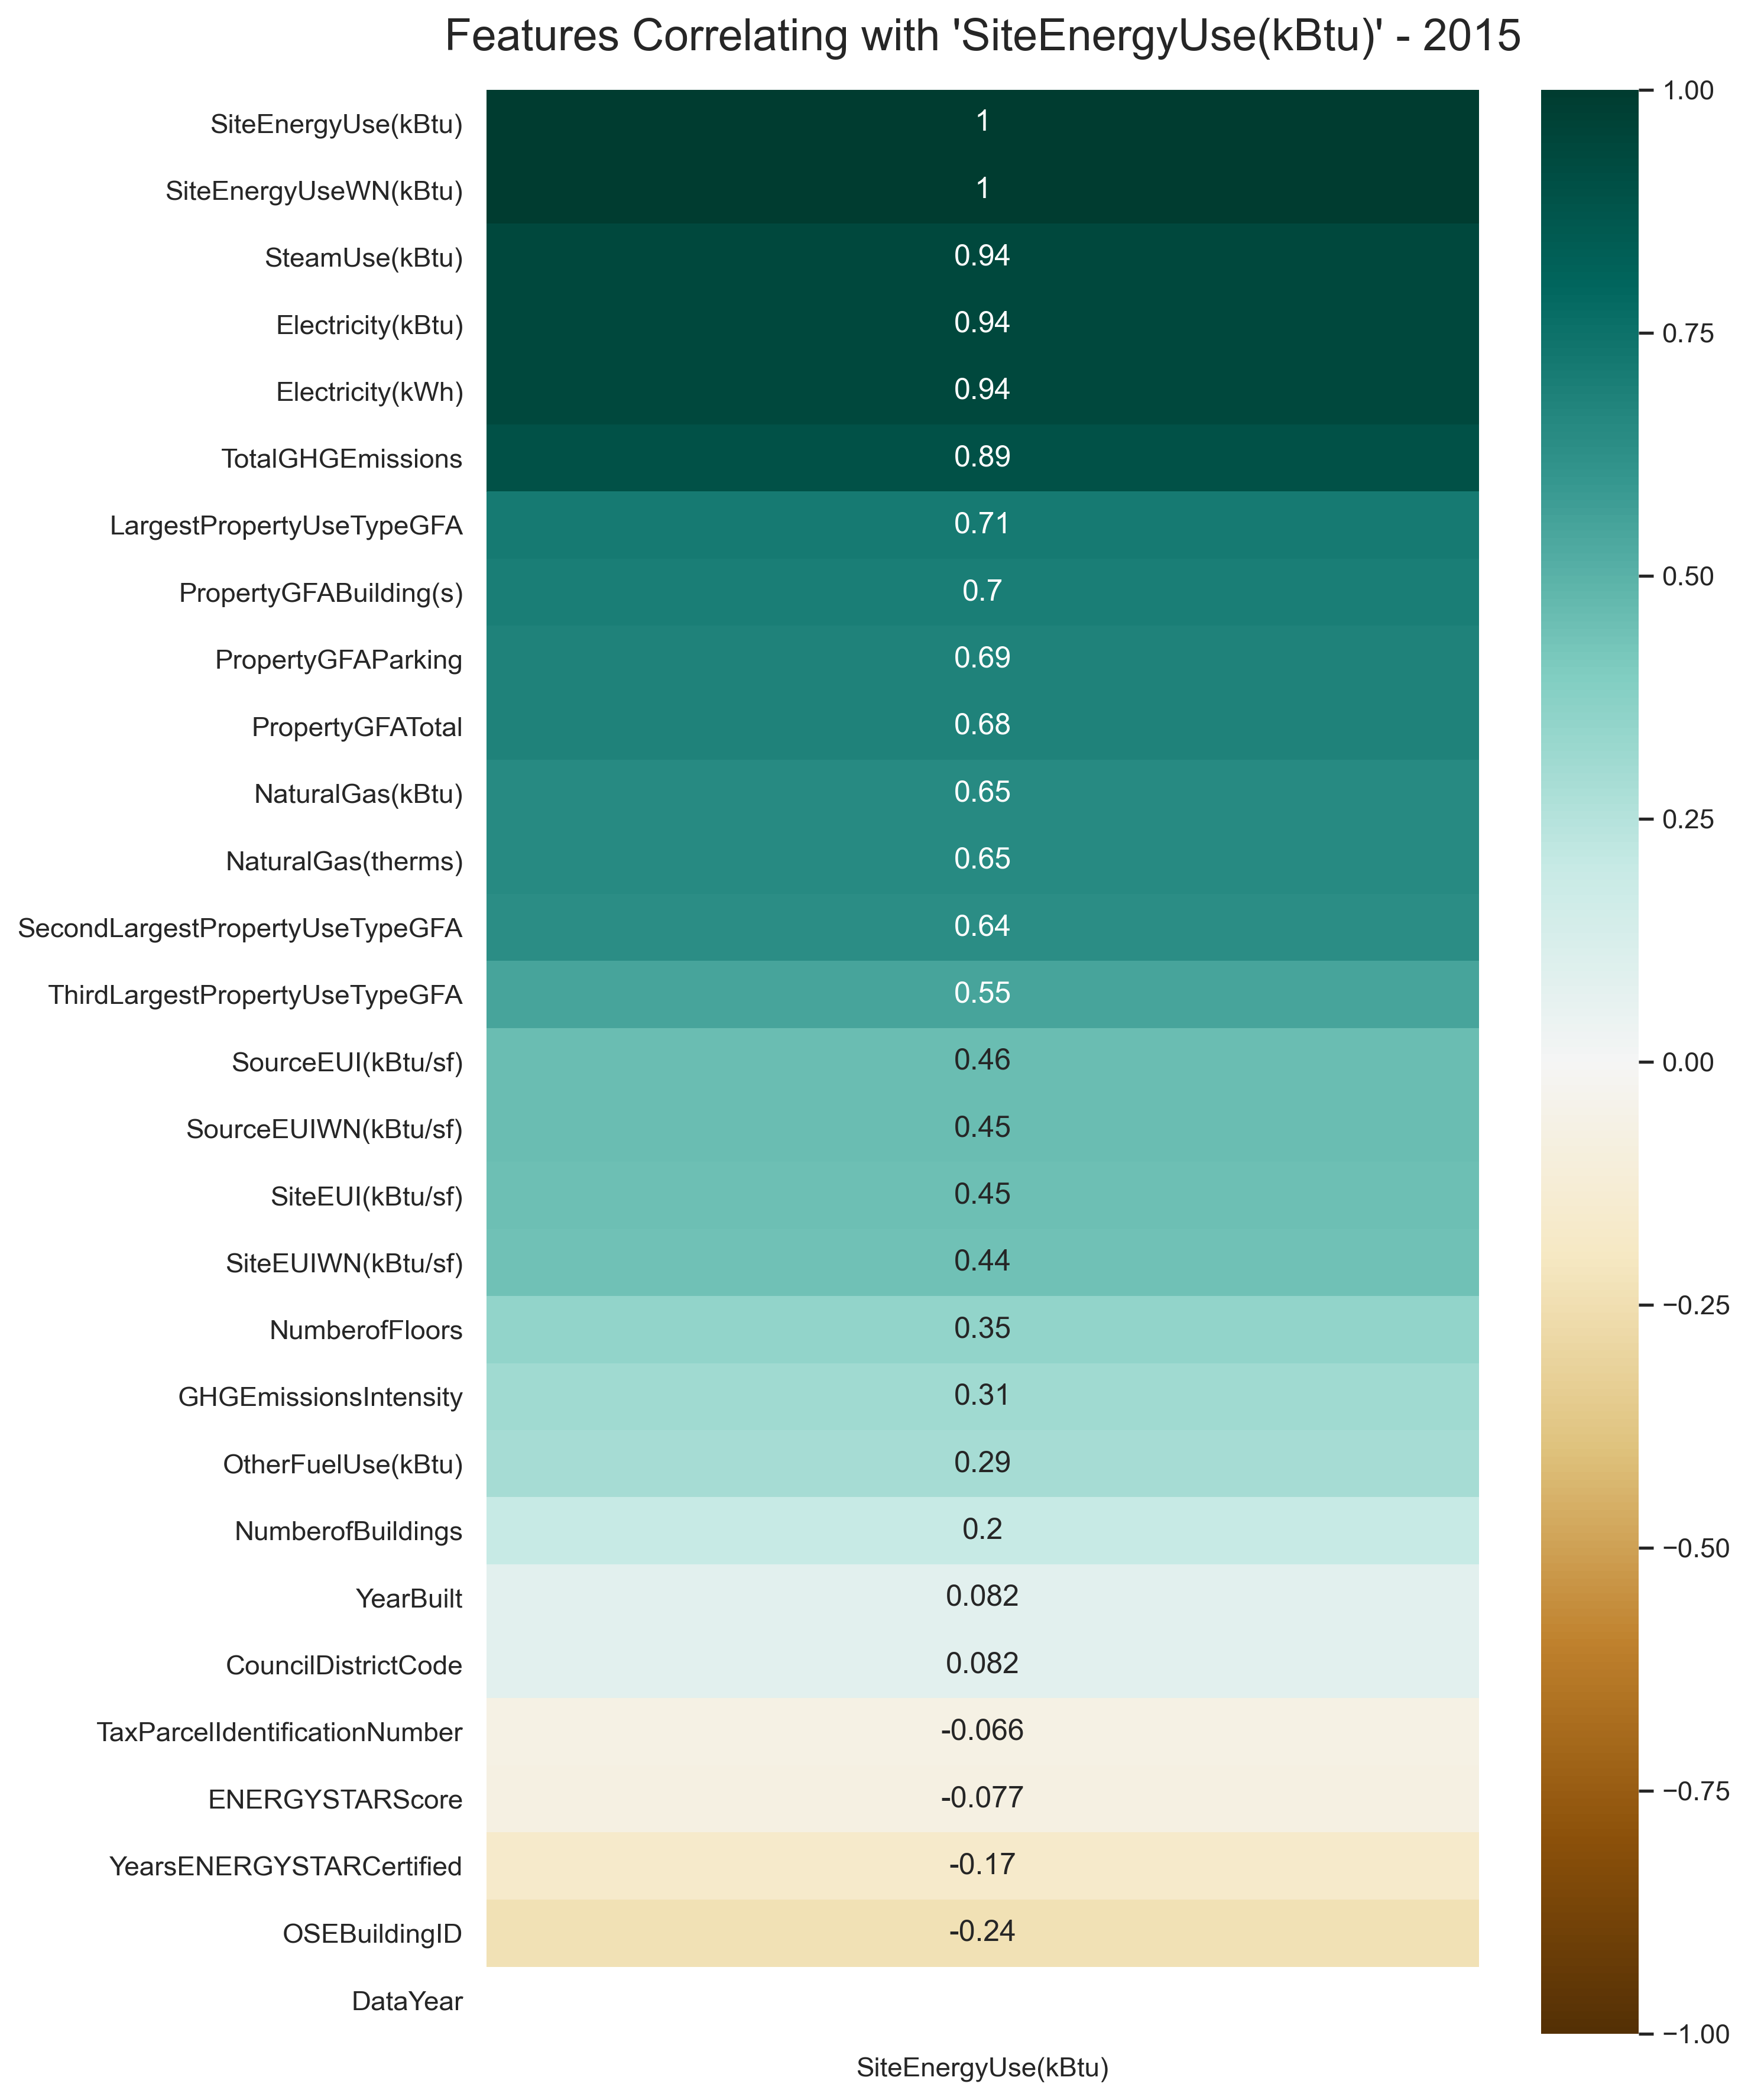

In [349]:
plt.figure(figsize=(10, 12), dpi=300)
heatmap = sns.heatmap(data.corr()[['SiteEnergyUse(kBtu)']].sort_values(by='SiteEnergyUse(kBtu)', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title(f"Features Correlating with 'SiteEnergyUse(kBtu)' - {year}", fontdict={'fontsize':18}, pad=16)
plt.tight_layout()

# Sauvegarde
file = int(year)
plt.savefig(f"projets\\04_seattle_building_energy\\production\\savefig\\{file}\\'SiteEnergyUse(kBtu)'_Features_{file}.png", transparent=True)

'ENERGYSTARScore' est une variable non corélée avec 'SiteEnergyUse(kBtu)'

Une prédiction de 'SiteEnergyUse(kBtu)' semble possible en fonction du type d'énergie:
- Electricity(kBtu): 0.94
- SteamUse(kBtu): 0.94
- NaturalGas(kBtu): 0.65

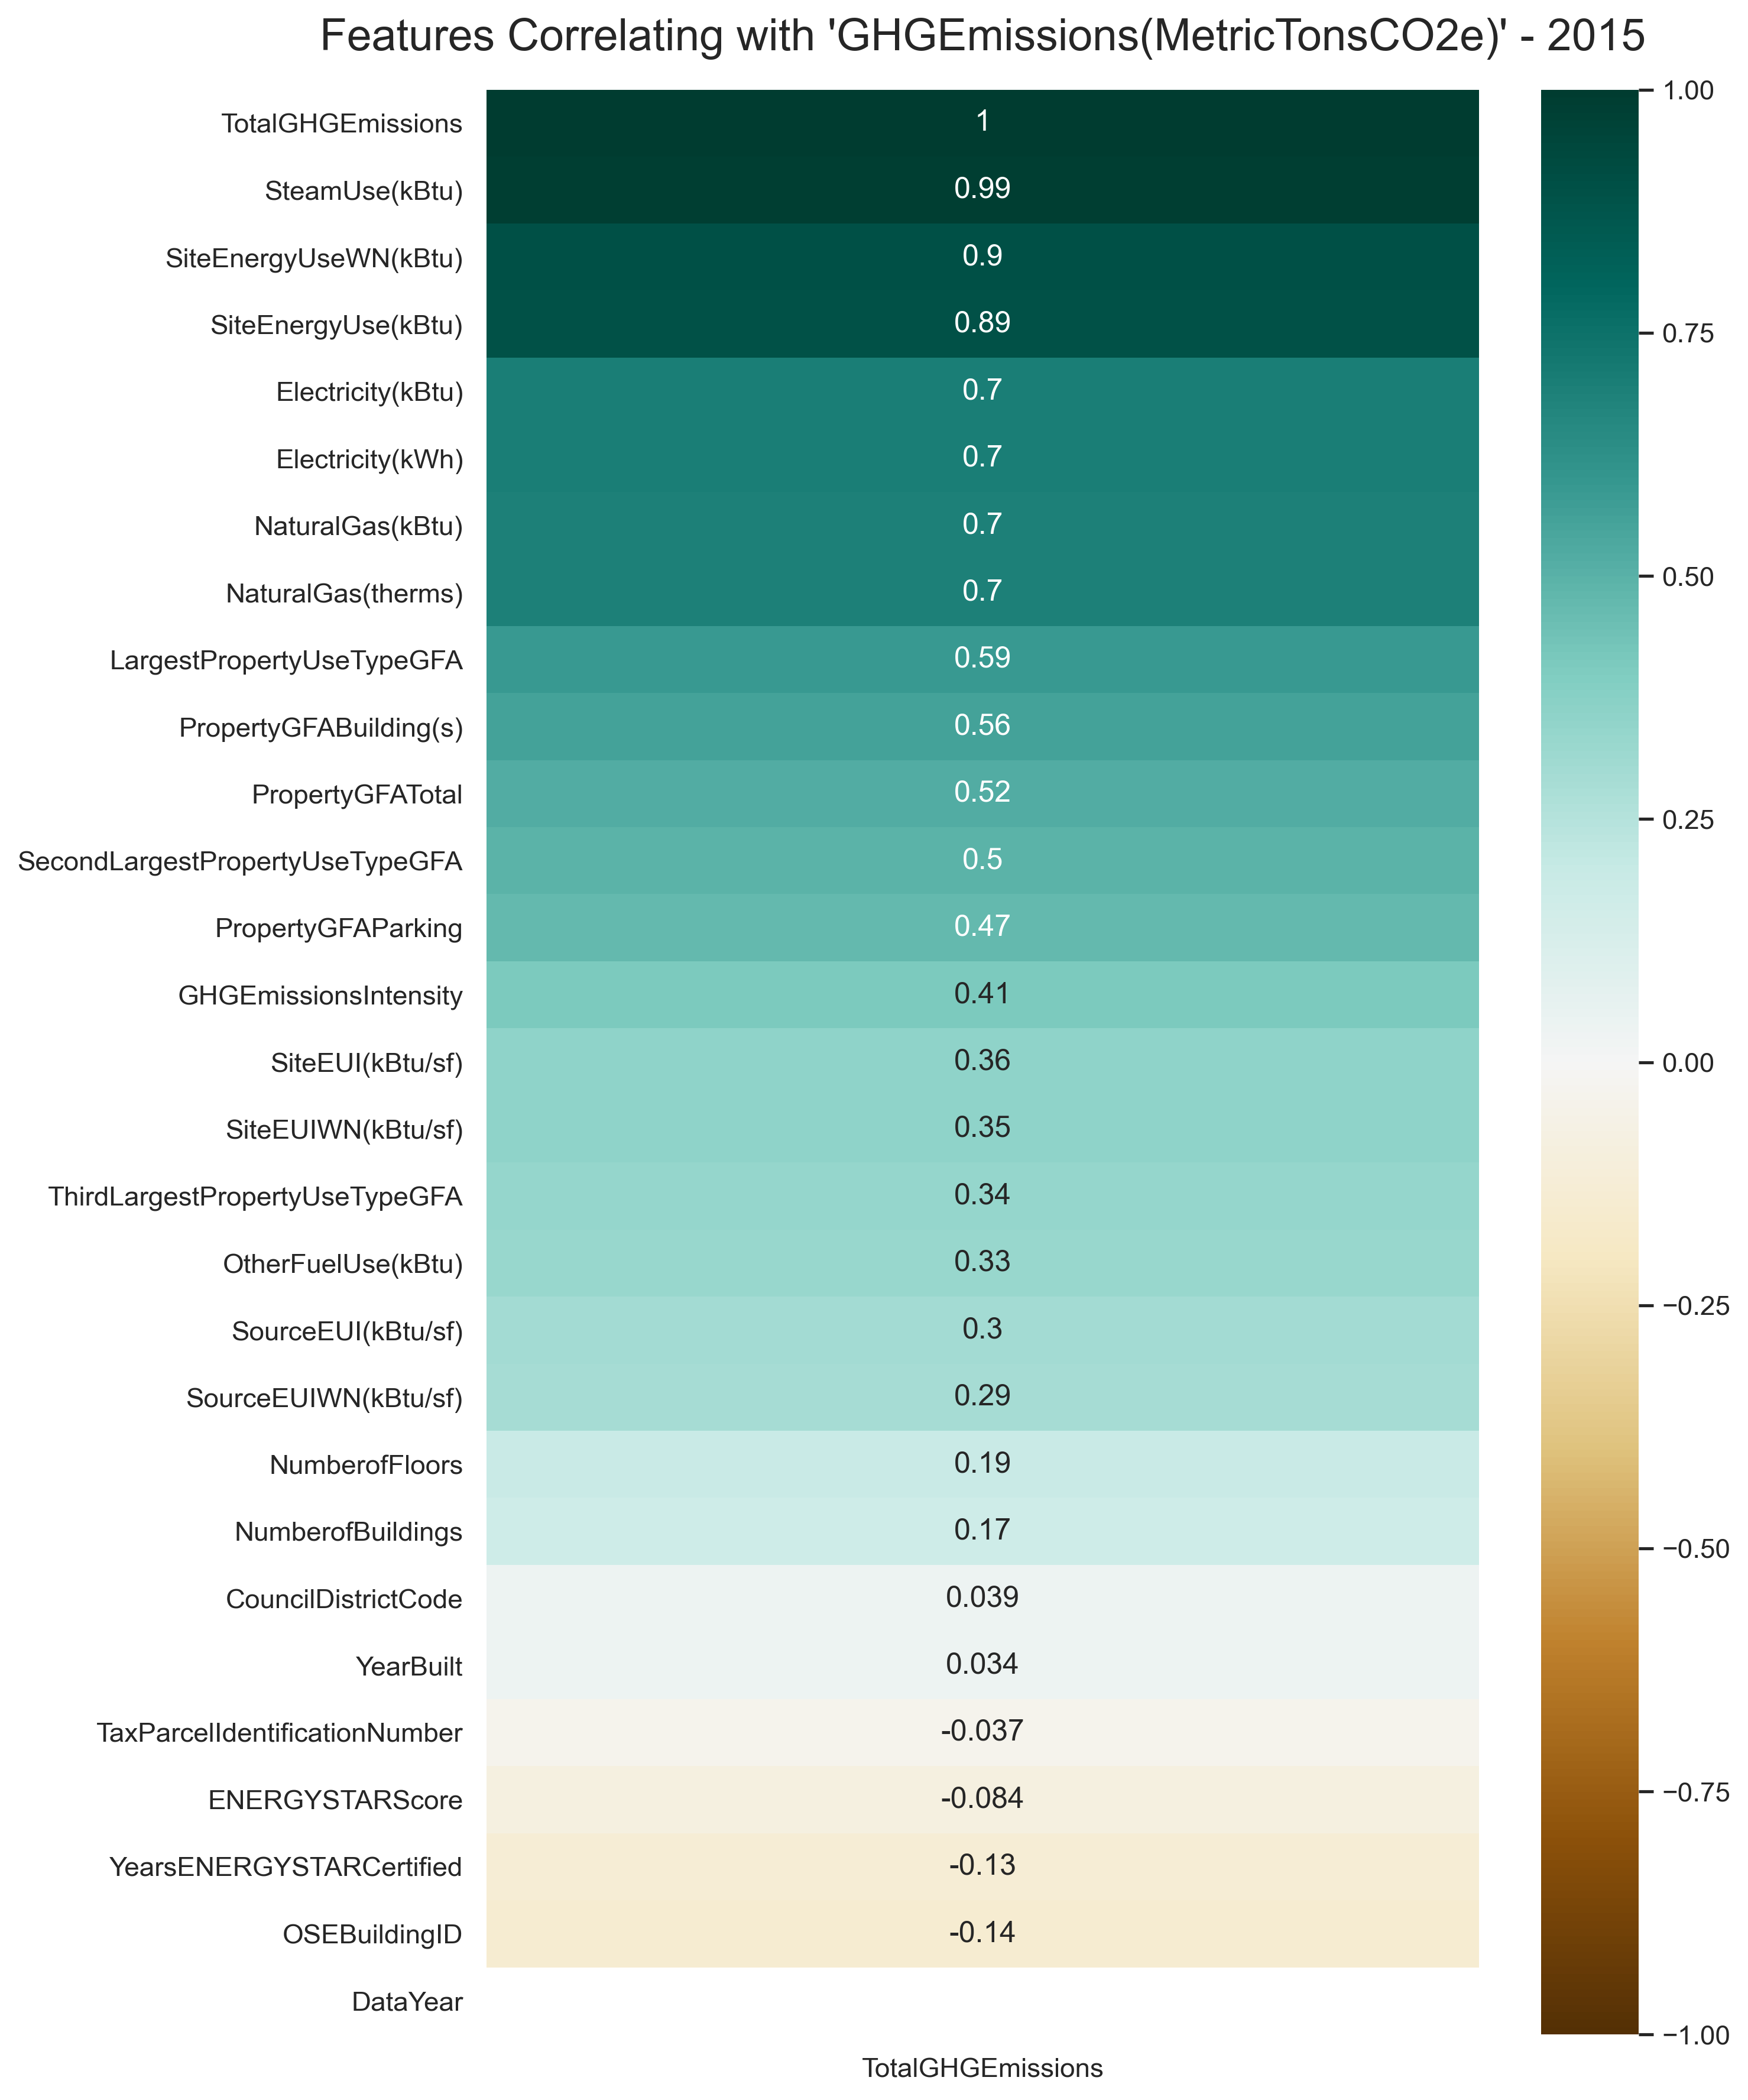

In [350]:
plt.figure(figsize=(10, 12), dpi=300)
heatmap = sns.heatmap(data.corr()[['TotalGHGEmissions']].sort_values(by='TotalGHGEmissions', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title(f"Features Correlating with 'GHGEmissions(MetricTonsCO2e)' - {year}", fontdict={'fontsize':18}, pad=16)
plt.tight_layout()

# Sauvegarde
file = int(year)
plt.savefig(f"projets\\04_seattle_building_energy\\production\\savefig\\{file}\\'TotalGHGEmissions'_Features_{file}.png", transparent=True)

## Analyses Bivariées

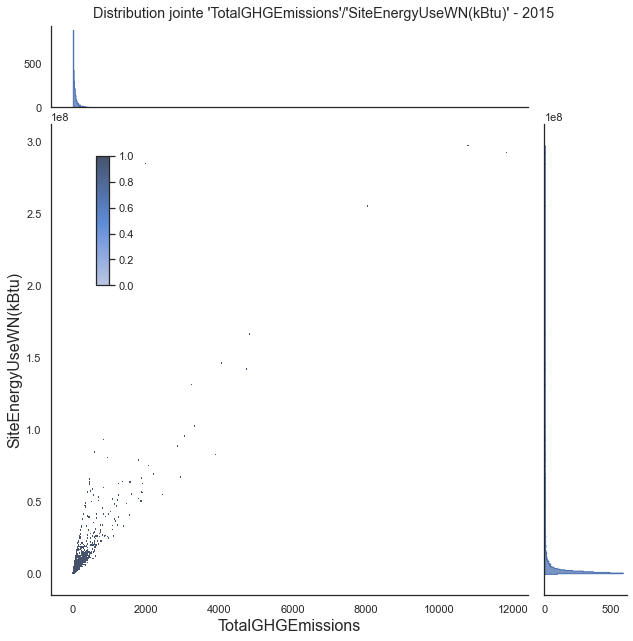

In [351]:
g = bi_joint_plot(data, 'TotalGHGEmissions', 'SiteEnergyUseWN(kBtu)', 9, .1)

g.fig.subplots_adjust(top=0.95) # adjust the Figure in rp
g.fig.suptitle(f"Distribution jointe 'TotalGHGEmissions'/'SiteEnergyUseWN(kBtu)' - {year}")

# Sauvegarde
file = int(year)
plt.savefig(f"projets\\04_seattle_building_energy\\production\\savefig\\{file}\\jointplot_'TotalGHGEmissions'_'SiteEnergyUseWN(kBtu)'_{file}.png", transparent=True,dpi=300)

Un passage au log est nécessaire

# TRANSFORMATION DES DONNEES

Analysons l'impact d'une imputation par la médiane ou valeur nulle, sur les proportion d'énergie totale

## Calcul de la répartition d'énergie totale

In [352]:
# Recherche de répartition d'énergie totale
elec_total = data['Electricity(kBtu)'].sum()
gas_total = data['NaturalGas(kBtu)'].sum()
steam_total = data['SteamUse(kBtu)'].sum()
energy_total = elec_total + gas_total + steam_total 

# Calcul des proportions totals d'énergie
elec_total_prop = elec_total/energy_total
gas_total_prop = gas_total/energy_total
steam_total_prop = steam_total/energy_total

elec_total_prop + gas_total_prop + steam_total_prop 

# Calcul des proportions totals d'énergie
energy_total_prop = [elec_total_prop, gas_total_prop, steam_total_prop]
energy_total_prop

[0.6999574438171805, 0.250666792637252, 0.04937576354556752]

## Imputation par la médiane 

In [353]:
# Création d'une copie de dataframe pour la transformation
data_01 = data.copy()

### Valeurs mesurées (si remplissage > 75%)

Suite à la visualisation de la matrice de corrélation, les variables suivantes sont imputées par la médiane pour obtenir un taux de remplissage de 100%:
- SiteEnergyUse(kBtu): actuellemment 99,7%
- SiteEnergyUseWN(kBtu): actuellemment 99,7%
- Electricity(kWh): actuellemment 99,7%
- Electricity(kBtu): actuellemment 99,7%
- SteamUse(kBtu): actuellemment 99,7%
- NaturalGas(kBtu): actuellemment 99,7%

In [354]:
for variable in float_measures_lst:
    if data_01[variable].notna().mean() >= 0.75:
        data_01.loc[data_01[variable].isna(), variable] = data_01[variable].median()

In [355]:
# Recherche de répartition d'énergie totale
elec_total = data_01['Electricity(kBtu)'].sum()
gas_total = data_01['NaturalGas(kBtu)'].sum()
steam_total = data_01['SteamUse(kBtu)'].sum()
energy_total = elec_total + gas_total + steam_total

# Calcul des proportions totals d'énergie
elec_total_prop = elec_total/energy_total
gas_total_prop = gas_total/energy_total
steam_total_prop = steam_total/energy_total

elec_total_prop + gas_total_prop + steam_total_prop 


1.0

In [356]:
# Calcul des proportions totales d'énergie
energy_total_prop_bis_2 = [elec_total_prop, gas_total_prop, steam_total_prop]
energy_total_prop_bis_2

[0.7001093768110518, 0.25053986212194773, 0.04935076106700048]

### 'NumberofBuildings'

In [357]:
if (int(year) == 2016) | (int(year) == 2017):
    data_01.loc[data_01['NumberofBuildings'].isna(), 'NumberofBuildings'] = int(data_01['NumberofBuildings'].median())

### 'NumberofFloors'

In [358]:
data_01.loc[data_01['NumberofFloors'].isna(), 'NumberofFloors'] = int(data_01['NumberofFloors'].median())

### 'ENERGYSTARScore'

In [359]:
data_01.loc[data_01['ENERGYSTARScore'].isna(), 'ENERGYSTARScore'] = int(data_01['ENERGYSTARScore'].median())

In [360]:
column_data_rate(data_01)

OSEBuildingID                      1.000000
DataYear                           1.000000
BuildingType                       1.000000
PrimaryPropertyType                1.000000
PropertyName                       1.000000
TaxParcelIdentificationNumber      0.998463
Location                           1.000000
CouncilDistrictCode                1.000000
Neighborhood                       1.000000
YearBuilt                          1.000000
NumberofBuildings                  1.000000
NumberofFloors                     1.000000
PropertyGFATotal                   1.000000
PropertyGFAParking                 0.276668
PropertyGFABuilding(s)             0.999385
ListOfAllPropertyUseTypes          0.962189
LargestPropertyUseType             0.959729
LargestPropertyUseTypeGFA          0.959729
SecondLargestPropertyUseType       0.466031
SecondLargestPropertyUseTypeGFA    0.433139
ThirdLargestPropertyUseType        0.166923
ThirdLargestPropertyUseTypeGFA     0.153704
YearsENERGYSTARCertified        

## Variables numériques - passage au log

Passage au log pour les valeurs numériques mesurées

In [361]:
# Création d'une copie de dataframe pour la transformation
data_02 = data_01.copy()

In [362]:
# passage au log sauf pour les variables ci-dessous
lst_no_log = ['OSEBuildingID','DataYear','TaxParcelIdentificationNumber', 'CouncilDistrictCode',
              'YearBuilt','NumberofFloors','ENERGYSTARScore','YearsENERGYSTARCertified','NumberofBuildings']

if (int(year) == 2018) | (int(year) == 2019):
    lst_no_log.remove('YearsENERGYSTARCertified')

if (int(year) == 2019):
    lst_no_log.remove('NumberofBuildings')

In [363]:
# passage au log
print("Passage au log pour les variables ci-dessous:\n")
for variable in float_measures_lst:
    #if variable not in lst_no_log:
    data_02[variable] = data_02[variable].map(lambda x: np.log10(x) if x!=np.NaN else np.NaN)
    print(variable)

Passage au log pour les variables ci-dessous:

SiteEUI(kBtu/sf)
SiteEUIWN(kBtu/sf)
SourceEUI(kBtu/sf)
SourceEUIWN(kBtu/sf)
SiteEnergyUse(kBtu)
SiteEnergyUseWN(kBtu)
SteamUse(kBtu)
Electricity(kWh)
Electricity(kBtu)
NaturalGas(therms)
NaturalGas(kBtu)
OtherFuelUse(kBtu)
GHGEmissionsIntensity
TotalGHGEmissions


## Déduction de nouvelles variables

### Création de variables:

#### 'elec_gas_steam_otherfuel_prop'

Calculons la répartion d'énergie par bâtiment:

In [364]:

def energy_prop(u, v, w):
    """Calcul des proportions de type d'énergie utilisées. Renvoie une liste dans l'ordre suivant:"""
    """proportions de: ['Electricity(kBtu)','NaturalGas(kBtu)','SteamUse(kBtu)']"""

    # Calcul de la somme d'énergie
    energy_sum = u+ v + w  


    # Calcul des proportions  
    energy_prop = []

    elec_prop = u/energy_sum

    natural_gas_prop = v/energy_sum

    steam_prop = w/energy_sum

    energy_prop.append(elec_prop)
    energy_prop.append(natural_gas_prop)
    energy_prop.append(steam_prop)

    return energy_prop 

In [365]:
# Cette fonction a été écrite avant l'imputatution
def energy_prop(u, v, w):
    """Calcul des proportions de type d'énergie utilisées. Renvoie une liste dans l'ordre suivant:"""
    """proportions de: ['Electricity(kBtu)','NaturalGas(kBtu)','SteamUse(kBtu)']"""

    # Calcul de la somme d'énergie
    if np.isnan(u):
        var1 = 0
    else:
        var1 = u

    if np.isnan(v):
        var2 = 0
    else:
        var2 = v

    if np.isnan(w):
        var3 = 0
    else:
        var3 = w

    energy_sum = var1 + var2 + var3


    # Calcul des proportions  
    energy_prop = []
    elec_prop = 0
    natural_gas_prop = 0
    steam_prop = 0   
    
    if energy_sum == 0:
        energy_prop = [0,0,0]
    else:
        if np.isnan(u):
            elec_prop = np.NaN
        else:
            elec_prop = u/energy_sum

        if np.isnan(v):
            natural_gas_prop = np.NaN
        else:
            natural_gas_prop = v/energy_sum

        if np.isnan(w):
            steam_prop = np.NaN
        else:
            steam_prop = w/energy_sum


    energy_prop.append(elec_prop)
    energy_prop.append(natural_gas_prop)
    energy_prop.append(steam_prop)

    return energy_prop 

In [366]:
# Ajout d'une variable pour en déduire les propotions de type d'énergie
data_02['elec_gas_steam_otherfuel_prop'] = data.apply(lambda row: energy_prop(row['Electricity(kBtu)'], row['NaturalGas(kBtu)'], row['SteamUse(kBtu)']), axis = 1)
data_02['elec_gas_steam_otherfuel_prop']

1          [0.435588738505571, 0.564411261494429, nan]
2       [0.6487819908516343, 0.35121800914836565, nan]
3       [0.5650038697094608, 0.43499613029053913, nan]
4                                      [1.0, nan, nan]
5       [0.6715924269259311, 0.32840757307406887, nan]
                             ...                      
3334                                   [1.0, nan, nan]
3335     [0.4034312522161307, 0.5965687477838693, nan]
3336    [0.7088533952567053, 0.29114660474329473, nan]
3338     [0.5743037104955222, 0.4256962895044778, nan]
3339                                   [1.0, nan, nan]
Name: elec_gas_steam_otherfuel_prop, Length: 3253, dtype: object

Cette variable est obsolète pour l'analyse et est calculée par simple but informatif

#### 'energy_type_01'

La transformation de données n'est pas utilisée ici pour ce calcul de variable 

les sources d'énergie sont classées par intensité et les modalités suivantes sont affectées:
nan, 'gas', 'other fuel', 'electricity', 'steam' puis labellisées

In [367]:
# source principale d'énergie
def energy_type_01(u, v, w):
    """Fonction répertoriant la source principale d'énergie entre ['electricity', 'gas', 'steam', 'other fuel']"""
    """Bien respecter l'ordre des arguments"""
    
    df = pd.DataFrame([u,v,w], columns=['a'] )
    df['b'] = ['electricity', 'gas', 'steam']
    df.sort_values(by=['a'], ascending=False,inplace=True)

    df.reset_index(inplace=True)
    type_01 = df['b'].iloc[0]

    if np.isnan(df['a'].iloc[0]):
        return np.NaN
    else:
        return type_01

In [368]:
# Ajout d'une variable pour en déduire les propotions de type d'énergie
data_02['energy_type_01'] = data.apply(lambda row: energy_type_01(row['Electricity(kBtu)'], row['NaturalGas(kBtu)'], row['SteamUse(kBtu)']), axis = 1)
data_02['energy_type_01']

1               gas
2       electricity
3       electricity
4       electricity
5       electricity
           ...     
3334    electricity
3335            gas
3336    electricity
3338    electricity
3339    electricity
Name: energy_type_01, Length: 3253, dtype: object

In [369]:
data_02['energy_type_01'].unique()

array(['gas', 'electricity', 'steam', nan], dtype=object)

In [370]:
data_02['energy_type_01'] = data_02['energy_type_01'].fillna('Class Missing')

#### 'energy_type_02'

In [371]:
# source secondaire d'énergie
def energy_type_02(u, v, w):
    """Fonction répertoriant la source secondaire d'énergie entre ['electricity', 'gas', 'steam']"""
    """Bien respecter l'ordre des arguments"""
    df = pd.DataFrame([u,v,w], columns=['a'] )
    df['b'] = ['electricity', 'gas', 'steam']
    df.sort_values(by=['a'], ascending=False,inplace=True)

    df.reset_index(inplace=True)
    type_02 = df['b'].iloc[1]
    
    if np.isnan(df['a'].iloc[1]):
        return np.NaN
    else:
        return type_02

In [372]:
# Ajout d'une variable pour en déduire les propotions de type d'énergie
data_02['energy_type_02'] = data.apply(lambda row: energy_type_02(row['Electricity(kBtu)'], row['NaturalGas(kBtu)'], row['SteamUse(kBtu)']), axis = 1)
data_02['energy_type_02']

1       electricity
2               gas
3               gas
4               NaN
5               gas
           ...     
3334            NaN
3335    electricity
3336            gas
3338            gas
3339            NaN
Name: energy_type_02, Length: 3253, dtype: object

In [373]:
data_02['energy_type_02'].unique()

array(['electricity', 'gas', nan, 'steam'], dtype=object)

In [374]:
data_02['energy_type_02'] = data_02['energy_type_02'].fillna('Class Missing')

#### 'energy_type_03'

In [375]:
# source tertiaire d'énergie
def energy_type_03(u, v, w):
    """Fonction répertoriant la source tertiaire d'énergie entre ['electricity', 'gas', 'steam']"""
    """Bien respecter l'ordre des arguments"""
    df = pd.DataFrame([u,v,w], columns=['a'] )
    df['b'] = ['electricity', 'gas', 'steam']
    df.sort_values(by=['a'], ascending=False,inplace=True)

    df.reset_index(inplace=True)
    type_03 = df['b'].iloc[2]
    
    if np.isnan(df['a'].iloc[2]):
        return np.NaN
    else:
        return type_03

In [376]:
# Ajout d'une variable pour en déduire les propotions de type d'énergie
data_02['energy_type_03'] = data.apply(lambda row: energy_type_03(row['Electricity(kBtu)'], row['NaturalGas(kBtu)'], row['SteamUse(kBtu)']), axis = 1)
data_02['energy_type_03']

1       NaN
2       NaN
3       NaN
4       NaN
5       NaN
       ... 
3334    NaN
3335    NaN
3336    NaN
3338    NaN
3339    NaN
Name: energy_type_03, Length: 3253, dtype: object

In [377]:
data_02['energy_type_03'].unique()

array([nan, 'gas', 'electricity', 'steam'], dtype=object)

In [378]:
data_02['energy_type_03'] = data_02['energy_type_03'].fillna('Class Missing')

##### target encoding

In [379]:
data_02['energy_type_03'].unique()

array(['Class Missing', 'gas', 'electricity', 'steam'], dtype=object)

In [380]:
target_encoder = TargetEncoder()
# Fit du modèle
target_encoder.fit(data_02['energy_type_03'], data_02['SiteEnergyUseWN(kBtu)'])

C:\Users\vince\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


TargetEncoder(cols=['energy_type_03'])

In [381]:
data_02 = target_encoding_transform_with_merge(data_02, 'energy_type_03', 'OSEBuildingID', target_encoder, 'energy_type_03_TargetEncoded')

In [382]:
column_data_rate(data_02)

OSEBuildingID                      1.000000
DataYear                           1.000000
BuildingType                       1.000000
PrimaryPropertyType                1.000000
PropertyName                       1.000000
TaxParcelIdentificationNumber      0.998463
Location                           1.000000
CouncilDistrictCode                1.000000
Neighborhood                       1.000000
YearBuilt                          1.000000
NumberofBuildings                  1.000000
NumberofFloors                     1.000000
PropertyGFATotal                   1.000000
PropertyGFAParking                 0.276668
PropertyGFABuilding(s)             0.999385
ListOfAllPropertyUseTypes          0.962189
LargestPropertyUseType             0.959729
LargestPropertyUseTypeGFA          0.959729
SecondLargestPropertyUseType       0.466031
SecondLargestPropertyUseTypeGFA    0.433139
ThirdLargestPropertyUseType        0.166923
ThirdLargestPropertyUseTypeGFA     0.153704
YearsENERGYSTARCertified        

In [383]:
target_encoder = TargetEncoder()
# Fit du modèle
target_encoder.fit(data_02['energy_type_02'], data_02['SiteEnergyUseWN(kBtu)'])

C:\Users\vince\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


TargetEncoder(cols=['energy_type_02'])

In [384]:
data_02 = target_encoding_transform_with_merge(data_02, 'energy_type_02', 'OSEBuildingID', target_encoder, 'energy_type_02_TargetEncoded')

In [385]:
target_encoder = TargetEncoder()
# Fit du modèle
target_encoder.fit(data_02['energy_type_01'], data_02['SiteEnergyUseWN(kBtu)'])

C:\Users\vince\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


TargetEncoder(cols=['energy_type_01'])

In [386]:
data_02 = target_encoding_transform_with_merge(data_02, 'energy_type_01', 'OSEBuildingID', target_encoder, 'energy_type_01_TargetEncoded')

## Variables numériques - discrétisation

### 'SiteEnergyUse(kBtu)'

#### 4 sous-groupes

In [387]:
if int(year) == 2015: 
    var_1 = data_02['SiteEnergyUse(kBtu)'].quantile(q=0.05)
    print(var_1)

5.700368415652791


In [388]:
if int(year) == 2015: 
    var_2 = data_02['SiteEnergyUse(kBtu)'].quantile(q=0.7)
    print(var_2)

6.499465451599453


In [389]:
if int(year) == 2015: 
    var_3 = data_02['SiteEnergyUse(kBtu)'].quantile(q=0.95)
    print(var_3)

7.241071809508594


In [390]:
def target_cat(x, u=var_1, v=var_2, w=var_3):
    """Fonction permettant de discrétiser la target à partir """
    
    if (x<u):
        out = 'Lowest Use'
    
    if (x>=u and x<v):
        out = 'Medium-Low'
    
    if (x>=v and x<w):
        out = 'Medium-High'
    
    if (x>=w):
        out = 'Highest Use'
        
    return out

In [391]:
data_02['SiteEnergyUse(kBtu)_cat'] = data_02['SiteEnergyUse(kBtu)'].apply(lambda x: target_cat(x))

In [392]:
data_02['SiteEnergyUse(kBtu)_cat']

0        Medium-Low
1       Medium-High
2       Highest Use
3       Medium-High
4       Medium-High
           ...     
3248     Medium-Low
3249     Medium-Low
3250    Medium-High
3251     Medium-Low
3252     Medium-Low
Name: SiteEnergyUse(kBtu)_cat, Length: 3253, dtype: object

In [393]:
data_02['SiteEnergyUse(kBtu)_cat'].value_counts()

Medium-Low     2114
Medium-High     813
Highest Use     163
Lowest Use      163
Name: SiteEnergyUse(kBtu)_cat, dtype: int64

#### labelling encoding

In [394]:
# un preprocessing est utilisé pour labelliser de la même manière les autres variables
# pour tous les ans, en commençant par 2015
if int(year) == 2015: 
    # creating instance of labelencoder
    labelencoder = preprocessing.LabelEncoder()

In [395]:

# Création de DataFrame pour mettre en évidence les catégories - 'energy_type_3'
SiteEnergyUse_df = pd.DataFrame(data_02['SiteEnergyUse(kBtu)_cat'].unique(), columns=['SiteEnergyUse(kBtu)_cat'])
SiteEnergyUse_df['SiteEnergyUse(kBtu)_cat'] = SiteEnergyUse_df['SiteEnergyUse(kBtu)_cat'].astype('category')

# Fit du modèle
labelencoder.fit(SiteEnergyUse_df['SiteEnergyUse(kBtu)_cat'])

LabelEncoder()

In [396]:
data_02 = label_encoding_transform_with_merge(data_02, 'SiteEnergyUse(kBtu)_cat', 'OSEBuildingID', labelencoder, 'SiteEnergyUse(kBtu)_cat_LabelEncoded')

### 'SiteEnergyUseWN(kBtu)'

#### 4 sous-groupes

Afin d'obtenir la même discrétisation pour toutes les années, les valeurs correspondants au quantiles q=[0, 0.05, 0.7, 0.95, 1] sont utilisées à partir de l'année 2015

In [397]:
if int(year) == 2015: 
    var_1 = data_02['SiteEnergyUseWN(kBtu)'].quantile(q=0.05)
    print(var_1)

5.735090856513309


In [398]:
if int(year) == 2015: 
    var_2 = data_02['SiteEnergyUseWN(kBtu)'].quantile(q=0.7)
    print(var_2)

6.5410789857747265


In [399]:
if int(year) == 2015: 
    var_3 = data_02['SiteEnergyUseWN(kBtu)'].quantile(q=0.95)
    print(var_3)

7.251600291501371


In [400]:
data_02['SiteEnergyUseWN(kBtu)_cat'] = data_02['SiteEnergyUseWN(kBtu)'].apply(lambda x: target_cat(x))

In [401]:
data_02['SiteEnergyUseWN(kBtu)_cat'].value_counts()

Medium-Low     2080
Medium-High     891
Highest Use     164
Lowest Use      118
Name: SiteEnergyUseWN(kBtu)_cat, dtype: int64

#### labelling encoding

In [402]:

# Création de DataFrame pour mettre en évidence les catégories - 'energy_type_3'
SiteEnergyUse_df = pd.DataFrame(data_02['SiteEnergyUseWN(kBtu)_cat'].unique(), columns=['SiteEnergyUseWN(kBtu)_cat'])
SiteEnergyUse_df['SiteEnergyUseWN(kBtu)_cat'] = SiteEnergyUse_df['SiteEnergyUseWN(kBtu)_cat'].astype('category')

# Fit du modèle
labelencoder.fit(SiteEnergyUse_df['SiteEnergyUseWN(kBtu)_cat'])

LabelEncoder()

In [403]:
data_02 = label_encoding_transform_with_merge(data_02, 'SiteEnergyUseWN(kBtu)_cat', 'OSEBuildingID', labelencoder, 'SiteEnergyUseWN(kBtu)_cat_LabelEncoded')

## Variables catégorielles - encodage (pour sélection)

In [404]:
# Taux de remplissage par colonne:
column_data_rate(data_02)

OSEBuildingID                             1.000000
DataYear                                  1.000000
BuildingType                              1.000000
PrimaryPropertyType                       1.000000
PropertyName                              1.000000
TaxParcelIdentificationNumber             0.998463
Location                                  1.000000
CouncilDistrictCode                       1.000000
Neighborhood                              1.000000
YearBuilt                                 1.000000
NumberofBuildings                         1.000000
NumberofFloors                            1.000000
PropertyGFATotal                          1.000000
PropertyGFAParking                        0.276668
PropertyGFABuilding(s)                    0.999385
ListOfAllPropertyUseTypes                 0.962189
LargestPropertyUseType                    0.959729
LargestPropertyUseTypeGFA                 0.959729
SecondLargestPropertyUseType              0.466031
SecondLargestPropertyUseTypeGFA

### 'PrimaryPropertyType'

#### Création de catégories hiérarchiques

In [405]:
data_02['PrimaryPropertyType'].nunique()

27

In [406]:
data_02['PrimaryPropertyType'].value_counts(True)

Low-Rise Multifamily           0.295727
Mid-Rise Multifamily           0.160467
Small- and Mid-Sized Office    0.087304
Other                          0.079311
Non-Refrigerated Warehouse     0.057485
Large Office                   0.049493
K-12 School                    0.041193
Mixed Use Property             0.038733
High-Rise Multifamily          0.030741
Retail Store                   0.029511
Worship Facility               0.022133
Hotel                          0.021826
Distribution Center\n          0.015678
Medical Office                 0.013219
Senior Care Community          0.013219
Supermarket/Grocery Store      0.011067
Self-Storage Facility\n        0.008300
College/University             0.006763
Residence Hall/Dormitory       0.004611
Refrigerated Warehouse         0.003996
Restaurant\n                   0.003381
Hospital                       0.003074
SPS-District K-12              0.001230
Distribution Center            0.000615
Restaurant                     0.000307


In [407]:
data_02.groupby('PrimaryPropertyType')['SiteEnergyUse(kBtu)'].median().sort_values(ascending=False)

PrimaryPropertyType
Hospital                       7.934831
Laboratory                     7.402955
Distribution Center            7.106195
Large Office                   7.071788
Supermarket/Grocery Store      6.969824
Hotel                          6.832970
High-Rise Multifamily          6.811255
Medical Office                 6.778904
Self-Storage Facility          6.725820
Senior Care Community          6.718616
Restaurant\n                   6.650368
College/University             6.600835
Other                          6.519108
Mixed Use Property             6.367361
Retail Store                   6.362644
K-12 School                    6.316231
Small- and Mid-Sized Office    6.314625
Mid-Rise Multifamily           6.285439
Residence Hall/Dormitory       6.269723
SPS-District K-12              6.182950
Refrigerated Warehouse         6.104767
Non-Refrigerated Warehouse     6.075329
Distribution Center\n          6.040283
Restaurant                     5.983003
Low-Rise Multifamily

In [408]:
xType_01 = ['Multifamily Housing']

In [409]:
xType_02 = ['Office','Medical Office','Financial Office',
                          'Other - Public Services','Bank Branch',
                         'Other - Services', 'Police Station',
                          'Small- and Mid-Sized Office','Large Office',
                         'Police Stat','Medical Off','Financial O','Other - Ser']

In [410]:
xType_03 = ['K-12 School','College/University','Adult Education',
                          'Pre-school/Daycare',
                          'Other - Education','SPS-District K-12','University',
                         'College/Uni','Other - Edu','Adult Educa','Pre-school/',
                         'Vocational School']

In [411]:
xType_04 = ['Mixed Use Property','High-Rise Multifamily',
                          'Mid-Rise Multifamily','Low-Rise Multifamily','Multifamily']

In [412]:
xType_05 = ['Non-Refrigerated Warehouse','Retail Store',
                          'Distribution Center','Self-Storage Facility',
                          'Repair Services (Vehicle, Shoe, Locksmith, etc)',
                          'Automobile Dealership','Other - Utility','Fire Station',
                          'Transportation Terminal/Station','Energy/Power Station',
                          'Mailing Center/Post Office', 'Distribution Center\n',
                         'Self-Storage Facility\n','Warehouse','Automobile',
                         'Self-Storag','Non-Refrige','Retail Stor','Fire Statio',
                         'Repair Serv','Distributio','Other - Uti']

In [413]:
xType_06 = ['Refrigerated Warehouse','Supermarket/Grocery Store',
                          'Strip Mall','Enclosed Mall',
                          'Lifestyle Center','Other - Mal','Enclosed Ma',
                         'Supermarket','Refrigerate','Lifestyle C',
                         'Convenience Store without Gas Station',
                         'Food Service','Food Sales']


In [414]:
xType_07 = ['Hotel','Residence Hall/Dormitory','Restaurant',
                          'Other - Lodging/Residential',
                          'Other - Restaurant/Bar','Prison/Incarceration',
                          'Restaurant\n',
                         'Supermarket / Grocery Store','Other - Lod',
                         'Residence H','Other - Res','Food Servic',
                         'Barracks','Fast Food Restaurant']

In [415]:
xType_08 = ['Senior Care Community','Hospital (General Medical & Surgical)',
                          'Other/Specialty Hospital','Residential Care Facility',
                          'Urgent Care/Clinic/Other Outpatient',
                          'Outpatient Rehabilitation/Physical Therapy',
                          'Personal Services (Health/Beauty, Dry Cleaning, etc)',
                          'Hospital','Senior Care','Hospital (G','Other/Speci',
                         'Urgent Care','Residential','Personal Se']

In [416]:
xType_09 = ['Manufacturing/Industrial Plant','Data Center','Laboratory',
                         'Manufacturi']

In [417]:
xType_10 = ['Other','Other - Recreation','Parking','Other - Entertainment/Public Assembly',
                          'Social/Meeting Hall','Museum','Other - Mall','Performing Arts',
                          'Fitness Center/Health Club/Gym','Library','Courthouse',
            'Convention Center',
                          'Stadium (Open)','Movie Theater','Worship Facility',
            'Residence Hall',
                         'Wholesale Club/Supercenter','Other - Ent','Fitness Cen',
                         'Social/Meet','Worship Fac','Convention','Wholesale C',
                         'Other - Rec','Other - Pub','Performing','Movie Theat',
                         'Bar/Nightclub','Swimming Pool','Other - Technology/Science']


In [418]:
xType = xType_01 + xType_02 + xType_03 + xType_04 + xType_05 + xType_06 + xType_07 + xType_08 + xType_09 + xType_10
len(xType)

128

In [419]:
# Vérification de l'oubli de variables
for var in list(data_02['PrimaryPropertyType'].unique()):
    if var not in xType:
        print(f"{var}.")

In [420]:
def type_category_change(u):
    """Fonction remplaçant le type par une catégorie hiérarchique"""
    
    if u in xType_01:
        u = 'Multifamily Housing'
        
    if u in xType_02:
        u = 'Office'
        
    if u in xType_03:
        u = 'Education'
    
    if u in xType_04:
        u = 'Mixed Use Property'
    
    if u in xType_05:
        u = 'Logistic/Distribution centers'
    
    if u in xType_06:
        u = 'Commercial centers'
    
    if u in xType_07:
        u = 'Hotel/Restaurant'
    
    if u in xType_08:
        u = 'Health services'
    
    if u in xType_09:
        u = 'Industry'
    
    if u in xType_10:
        u = 'Other/Public places'
        
    if pd.isnull(u):
        u = 'Class Missing'
        
    return u
    

In [421]:
# Remplacement des catégories par celles hiérarchiques
data_02['PrimaryPropertyType_new_cat'] = data_02.apply(lambda row: type_category_change(row['PrimaryPropertyType']), axis = 1)
data_02['PrimaryPropertyType_new_cat']

0         Hotel/Restaurant
1       Mixed Use Property
2         Hotel/Restaurant
3       Commercial centers
4                Education
               ...        
3248    Mixed Use Property
3249    Mixed Use Property
3250    Mixed Use Property
3251    Mixed Use Property
3252    Mixed Use Property
Name: PrimaryPropertyType_new_cat, Length: 3253, dtype: object

In [422]:
column_data_rate(data_02)

OSEBuildingID                             1.000000
DataYear                                  1.000000
BuildingType                              1.000000
PrimaryPropertyType                       1.000000
PropertyName                              1.000000
TaxParcelIdentificationNumber             0.998463
Location                                  1.000000
CouncilDistrictCode                       1.000000
Neighborhood                              1.000000
YearBuilt                                 1.000000
NumberofBuildings                         1.000000
NumberofFloors                            1.000000
PropertyGFATotal                          1.000000
PropertyGFAParking                        0.276668
PropertyGFABuilding(s)                    0.999385
ListOfAllPropertyUseTypes                 0.962189
LargestPropertyUseType                    0.959729
LargestPropertyUseTypeGFA                 0.959729
SecondLargestPropertyUseType              0.466031
SecondLargestPropertyUseTypeGFA

In [423]:
data_02['PrimaryPropertyType_new_cat'].value_counts(True)

Mixed Use Property               0.525669
Office                           0.150015
Logistic/Distribution centers    0.111897
Other/Public places              0.101445
Education                        0.049185
Hotel/Restaurant                 0.030126
Health services                  0.016293
Commercial centers               0.015063
Industry                         0.000307
Name: PrimaryPropertyType_new_cat, dtype: float64

In [424]:
data_02.groupby('PrimaryPropertyType_new_cat')['SiteEnergyUse(kBtu)'].median().sort_values(ascending=False)

PrimaryPropertyType_new_cat
Industry                         7.402955
Commercial centers               6.941487
Health services                  6.819037
Hotel/Restaurant                 6.717482
Office                           6.526546
Education                        6.341648
Other/Public places              6.329962
Mixed Use Property               6.120700
Logistic/Distribution centers    6.104308
Name: SiteEnergyUse(kBtu), dtype: float64

#### target encoding

In [425]:
target_encoder = TargetEncoder()
target_encoder.fit(data_02['PrimaryPropertyType_new_cat'], data_02['SiteEnergyUseWN(kBtu)'])


C:\Users\vince\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


TargetEncoder(cols=['PrimaryPropertyType_new_cat'])

In [426]:
data_02['PrimaryPropertyType_new_cat']

0         Hotel/Restaurant
1       Mixed Use Property
2         Hotel/Restaurant
3       Commercial centers
4                Education
               ...        
3248    Mixed Use Property
3249    Mixed Use Property
3250    Mixed Use Property
3251    Mixed Use Property
3252    Mixed Use Property
Name: PrimaryPropertyType_new_cat, Length: 3253, dtype: object

In [427]:
data_02 = target_encoding_transform_with_merge(data_02, 'PrimaryPropertyType_new_cat', 'OSEBuildingID', target_encoder, 'PrimaryPropertyType_new_cat_TargetEncoded')

### 'LargestPropertyUseType'

#### Création de catégories hiérarchiques

In [428]:
# Vérification de l'oubli de variables
for var in list(data_seattle_2019['LargestPropertyUseType'].unique()):
    if var not in xType:
        print(f"{var}.")

nan.


In [429]:
data_02['LargestPropertyUseType'].value_counts(True)

Multifamily Housing                                     0.495516
Office                                                  0.146060
Non-Refrigerated Warehouse                              0.062140
K-12 School                                             0.042921
Other                                                   0.033312
Retail Store                                            0.030429
Worship Facility                                        0.022422
Hotel                                                   0.021140
Distribution Center                                     0.016656
Medical Office                                          0.013773
Senior Care Community                                   0.013453
Supermarket/Grocery Store                               0.011851
Parking                                                 0.008969
Self-Storage Facility                                   0.008648
College/University                                      0.006726
Other - Recreation       

In [430]:
# Remplacement des catégories par celles hiérarchiques
data_02['LargestPropertyUseType_new_cat'] = data_02.apply(lambda row: type_category_change(row['LargestPropertyUseType']), axis = 1)
data_02['LargestPropertyUseType_new_cat']

0          Hotel/Restaurant
1             Class Missing
2          Hotel/Restaurant
3        Commercial centers
4                 Education
               ...         
3248    Multifamily Housing
3249    Multifamily Housing
3250    Multifamily Housing
3251    Multifamily Housing
3252    Multifamily Housing
Name: LargestPropertyUseType_new_cat, Length: 3253, dtype: object

#### target encoding

In [431]:
target_encoder = TargetEncoder()
target_encoder.fit(data_02['LargestPropertyUseType_new_cat'], data_02['SiteEnergyUseWN(kBtu)'])

C:\Users\vince\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


TargetEncoder(cols=['LargestPropertyUseType_new_cat'])

In [432]:
data_02 = target_encoding_transform_with_merge(data_02, 'LargestPropertyUseType_new_cat', 'OSEBuildingID', target_encoder, 'LargestPropertyUseType_new_cat_TargetEncoded')

### 'SecondLargestPropertyUseType'

#### Création de catégories hiérarchiques

In [433]:
# Vérification de l'oubli de variables
for var in list(data_seattle_2019['SecondLargestPropertyUseType'].unique()):
    if var not in xType:
        print(f"{var}.")

nan.


In [434]:
data_02['SecondLargestPropertyUseType'].value_counts(True)

Parking                                            0.570580
Office                                             0.132586
Retail Store                                       0.098945
Other                                              0.035620
Restaurant                                         0.027045
Non-Refrigerated Warehouse                         0.023087
Multifamily Housing                                0.010554
Supermarket/Grocery Store                          0.008575
Medical Office                                     0.007916
Other - Services                                   0.007256
Data Center                                        0.006596
Fitness Center/Health Club/Gym                     0.006596
Other - Entertainment/Public Assembly              0.005937
Swimming Pool                                      0.004617
K-12 School                                        0.003958
Distribution Center                                0.003958
Bank Branch                             

In [435]:
# Remplacement des catégories par celles hiérarchiques
data_02['SecondLargestPropertyUseType_new_cat'] = data_02.apply(lambda row: type_category_change(row['LargestPropertyUseType']), axis = 1)
data_02['SecondLargestPropertyUseType_new_cat']

0          Hotel/Restaurant
1             Class Missing
2          Hotel/Restaurant
3        Commercial centers
4                 Education
               ...         
3248    Multifamily Housing
3249    Multifamily Housing
3250    Multifamily Housing
3251    Multifamily Housing
3252    Multifamily Housing
Name: SecondLargestPropertyUseType_new_cat, Length: 3253, dtype: object

#### target encoding

In [436]:
target_encoder = TargetEncoder()
target_encoder.fit(data_02['SecondLargestPropertyUseType_new_cat'], data_02['SiteEnergyUseWN(kBtu)'])


C:\Users\vince\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


TargetEncoder(cols=['SecondLargestPropertyUseType_new_cat'])

In [437]:
data_02 = target_encoding_transform_with_merge(data_02, 'SecondLargestPropertyUseType_new_cat', 'OSEBuildingID', target_encoder, 'SecondLargestPropertyUseType_new_cat_TargetEncoded')

In [438]:
column_data_rate(data_02)

OSEBuildingID                                         1.000000
DataYear                                              1.000000
BuildingType                                          1.000000
PrimaryPropertyType                                   1.000000
PropertyName                                          1.000000
TaxParcelIdentificationNumber                         0.998463
Location                                              1.000000
CouncilDistrictCode                                   1.000000
Neighborhood                                          1.000000
YearBuilt                                             1.000000
NumberofBuildings                                     1.000000
NumberofFloors                                        1.000000
PropertyGFATotal                                      1.000000
PropertyGFAParking                                    0.276668
PropertyGFABuilding(s)                                0.999385
ListOfAllPropertyUseTypes                             0

### 'ThirdLargestPropertyUseType'

#### Création de catégories hiérarchiques

In [439]:
# Vérification de l'oubli de variables
for var in list(data_seattle_2019['ThirdLargestPropertyUseType'].unique()):
    if var not in xType:
        print(f"{var}.")

nan.


In [440]:
data_02['ThirdLargestPropertyUseType'].notna().mean()

0.16692284045496464

In [441]:
data_02['ThirdLargestPropertyUseType'].value_counts(True)

Retail Store                                            0.189687
Office                                                  0.182320
Parking                                                 0.108656
Other                                                   0.097606
Restaurant                                              0.095764
Swimming Pool                                           0.044199
Non-Refrigerated Warehouse                              0.033149
Medical Office                                          0.031308
Food Service                                            0.020258
Social/Meeting Hall                                     0.018416
Data Center                                             0.016575
Multifamily Housing                                     0.016575
Other - Restaurant/Bar                                  0.014733
Bank Branch                                             0.011050
Financial Office                                        0.009208
Other - Entertainment/Pub

In [442]:
# Remplacement des catégories par celles hiérarchiques
data_02['ThirdLargestPropertyUseType_new_cat'] = data_02.apply(lambda row: type_category_change(row['ThirdLargestPropertyUseType']), axis = 1)
data_02['ThirdLargestPropertyUseType_new_cat']

0                       Class Missing
1                       Class Missing
2                       Class Missing
3                       Class Missing
4                       Class Missing
                    ...              
3248                    Class Missing
3249                    Class Missing
3250    Logistic/Distribution centers
3251                    Class Missing
3252                    Class Missing
Name: ThirdLargestPropertyUseType_new_cat, Length: 3253, dtype: object

#### target encoding

In [443]:
target_encoder = TargetEncoder()
target_encoder.fit(data_02['ThirdLargestPropertyUseType_new_cat'], data_02['SiteEnergyUseWN(kBtu)'])

C:\Users\vince\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


TargetEncoder(cols=['ThirdLargestPropertyUseType_new_cat'])

In [444]:
data_02 = target_encoding_transform_with_merge(data_02, 'ThirdLargestPropertyUseType_new_cat', 'OSEBuildingID', target_encoder, 'ThirdLargestPropertyUseType_new_cat_TargetEncoded')

### 'CouncilDistrictCode'

#### target encoding

In [445]:
data_02['CouncilDistrictCode'].value_counts(True)

7    0.307101
3    0.175838
2    0.151552
5    0.104826
4    0.103289
1    0.083923
6    0.073471
Name: CouncilDistrictCode, dtype: float64

In [446]:
if (data_02['CouncilDistrictCode'].isna()).any():
    data_02.loc[data_02['CouncilDistrictCode'].isna(), 'CouncilDistrictCode'] = int(data_02['CouncilDistrictCode'].median())

In [447]:
district_df = pd.DataFrame([1,2,3,4,5,6,7], columns=['CouncilDistrictCode'])
district_df['CouncilDistrictCode'] = district_df['CouncilDistrictCode'].astype('category')

In [448]:
target_encoder = TargetEncoder()
target_encoder.fit(data_02['CouncilDistrictCode'], data_02['SiteEnergyUseWN(kBtu)'])

C:\Users\vince\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


TargetEncoder(cols=[])

In [449]:
data_02 = target_encoding_transform_with_merge(data_02, 'CouncilDistrictCode', 'OSEBuildingID', target_encoder, 'CouncilDistrictCode_TargetEncoded')

In [450]:
# Taux de remplissage par colonne:
column_data_rate(data_02)

OSEBuildingID                                         1.000000
DataYear                                              1.000000
BuildingType                                          1.000000
PrimaryPropertyType                                   1.000000
PropertyName                                          1.000000
TaxParcelIdentificationNumber                         0.998463
Location                                              1.000000
CouncilDistrictCode                                   1.000000
Neighborhood                                          1.000000
YearBuilt                                             1.000000
NumberofBuildings                                     1.000000
NumberofFloors                                        1.000000
PropertyGFATotal                                      1.000000
PropertyGFAParking                                    0.276668
PropertyGFABuilding(s)                                0.999385
ListOfAllPropertyUseTypes                             0

## Corrélation des variables catégorielles

In [451]:
categ_var_choice = ['SiteEnergyUseWN(kBtu)_cat_LabelEncoded',
                    'PrimaryPropertyType_new_cat_TargetEncoded',
                    'LargestPropertyUseType_new_cat_TargetEncoded',
                    'CouncilDistrictCode_TargetEncoded']

categ_var_choice = categ_var_choice + ['energy_type_01_TargetEncoded', 'energy_type_02_TargetEncoded', 'energy_type_03_TargetEncoded']

### V-Cramer

In [452]:
def cramers_V(var1,var2) :
    crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
    stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
    obs = np.sum(crosstab) # Number of observations
    mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
    return (stat/(obs*mini))

In [453]:
data_02_categ = data_02[categ_var_choice]

rows= []

for var1 in data_02_categ:
    col = []
    for var2 in data_02_categ:
        cramers = cramers_V(data_02_categ[var1], data_02_categ[var2]) # Cramer's V test
        col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
    rows.append(col)

cramers_results = np.array(rows)
data_02_categ_vcramer = pd.DataFrame(cramers_results, columns=data_02_categ.columns, index=data_02_categ.columns)

data_02_categ_vcramer

,SiteEnergyUseWN(kBtu)_cat_LabelEncoded,PrimaryPropertyType_new_cat_TargetEncoded,LargestPropertyUseType_new_cat_TargetEncoded,CouncilDistrictCode_TargetEncoded,energy_type_01_TargetEncoded,energy_type_02_TargetEncoded,energy_type_03_TargetEncoded
SiteEnergyUseWN(kBtu)_cat_LabelEncoded,1.00,0.08,0.08,0.02,0.00,0.04,0.01
PrimaryPropertyType_new_cat_TargetEncoded,0.08,1.00,0.71,0.04,0.04,0.05,0.02
LargestPropertyUseType_new_cat_TargetEncoded,0.08,0.71,1.00,0.04,0.03,0.06,0.02
CouncilDistrictCode_TargetEncoded,0.02,0.04,0.04,1.00,0.01,0.02,0.01
energy_type_01_TargetEncoded,0.00,0.04,0.03,0.01,1.00,0.33,0.06
energy_type_02_TargetEncoded,0.04,0.05,0.06,0.02,0.33,1.00,0.11
energy_type_03_TargetEncoded,0.01,0.02,0.02,0.01,0.06,0.11,1.00


# DATAVIZ - 02

## Analyses Univariées

In [454]:
num_graph_vars = float_lst 

len(num_graph_vars)

29

In [455]:
X = data_02[num_graph_vars].values

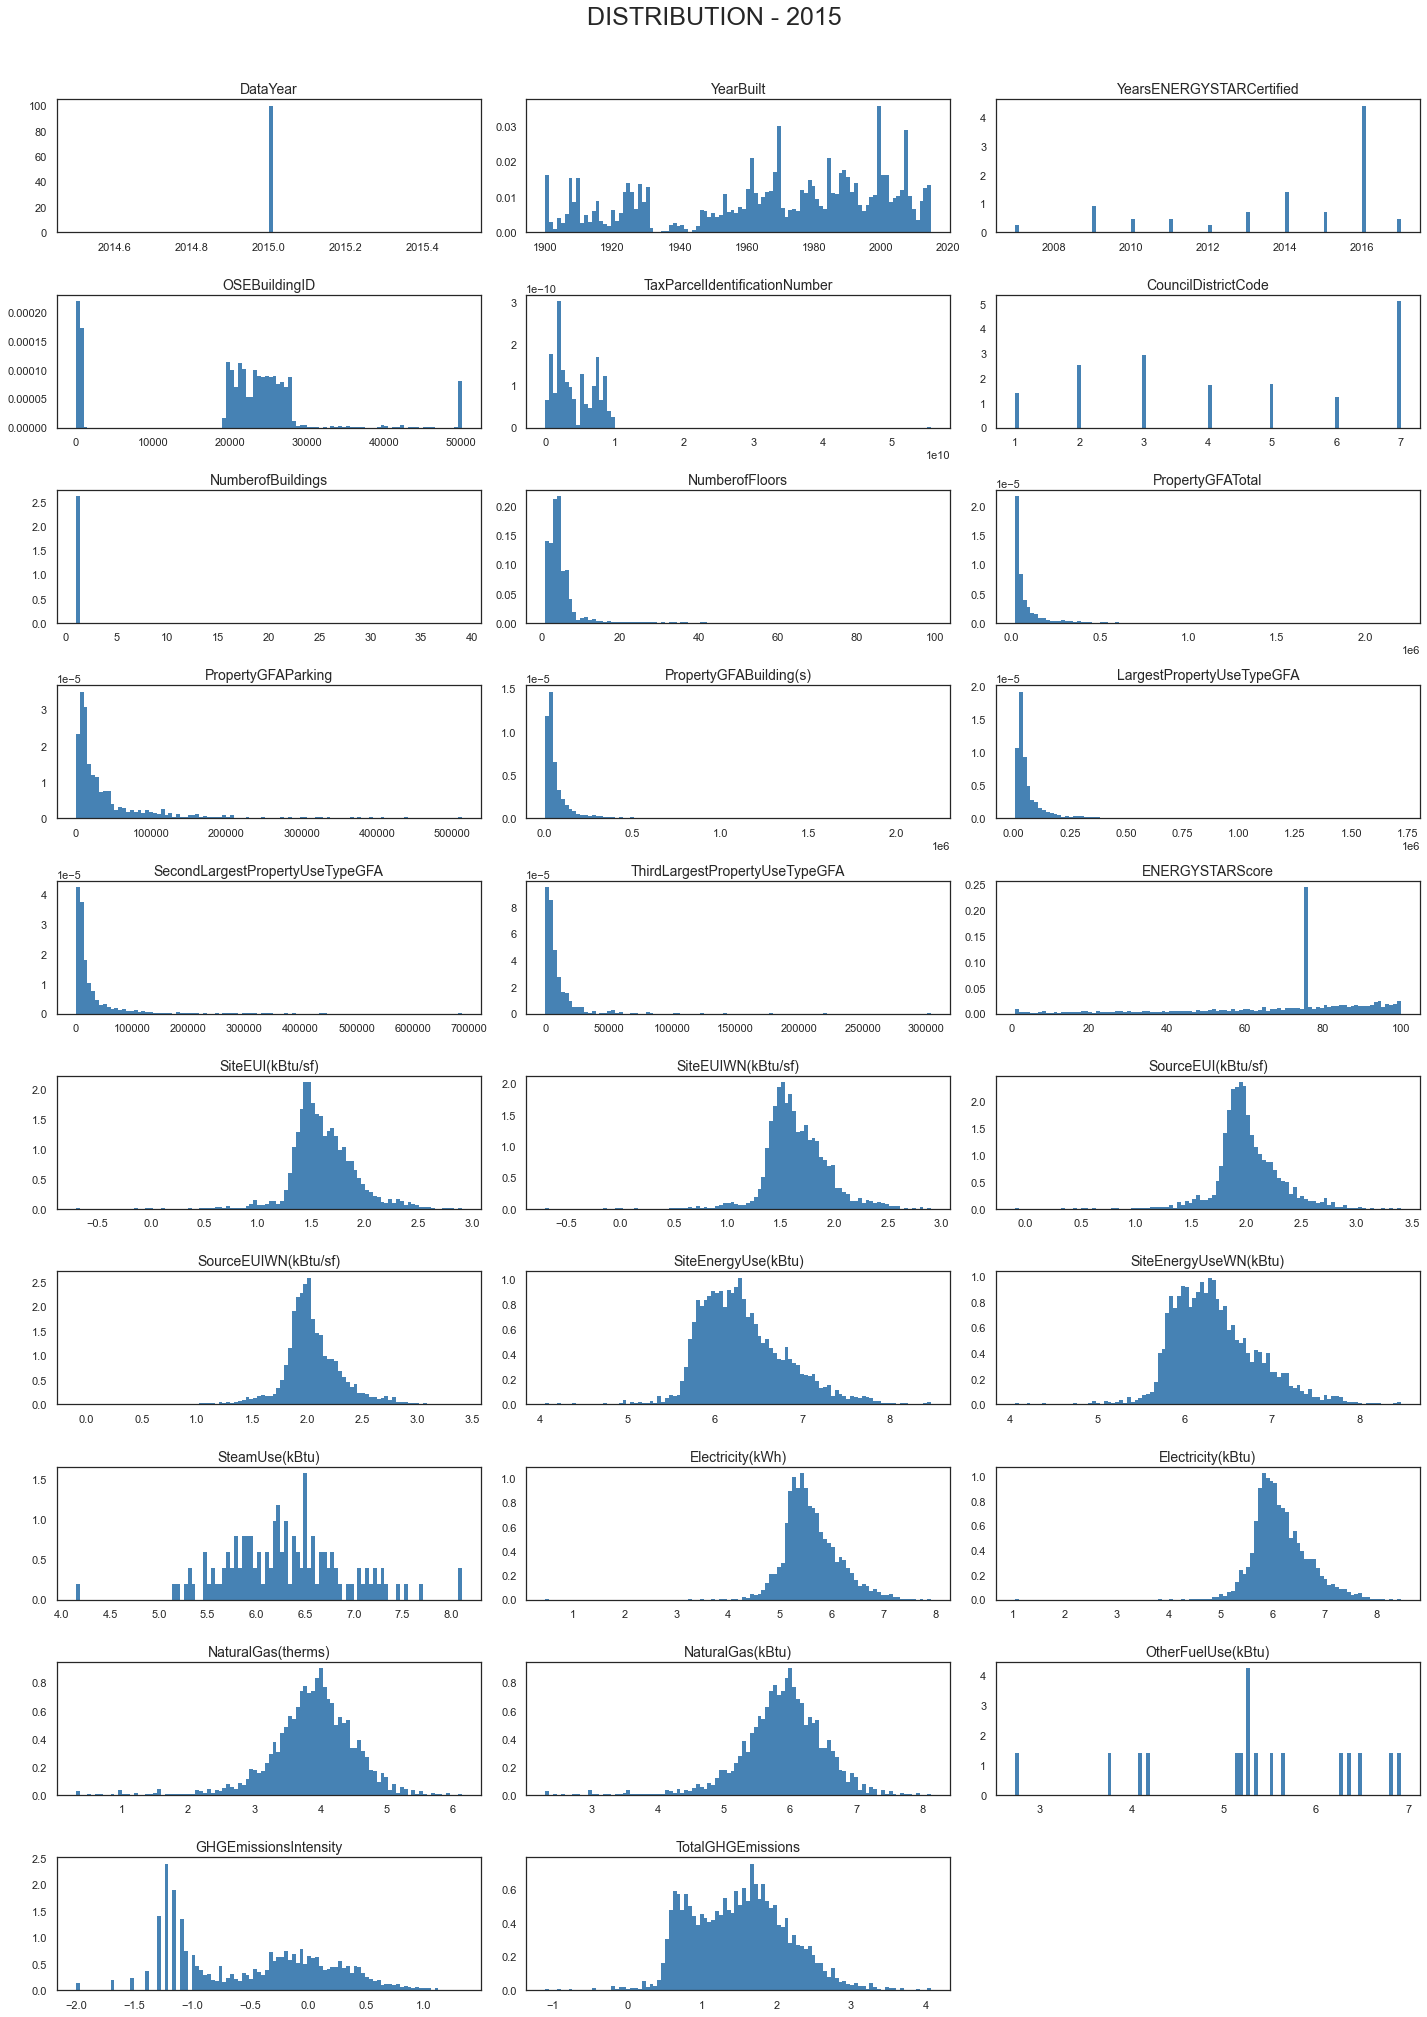

In [456]:
# Plots
fig = plt.figure(figsize=(20,35))
for feat_idx in range(data_02[num_graph_vars].shape[1]):
    sns.set_theme(style="white")
    ax = fig.add_subplot(13,3, (feat_idx+1))
    h = ax.hist(X[:, feat_idx], bins=100, color = 'steelblue', density=True, edgecolor='none')
    ax.set_title(data_02[num_graph_vars].columns[feat_idx], fontsize=14)
    
# Titre de la figure:
plt.tight_layout()
fig.suptitle(f"DISTRIBUTION - {year}", fontsize=25, x = 0.5, y = 1.025)

# Sauvegarde
file = int(year)
plt.savefig(f"projets\\04_seattle_building_energy\\production\\savefig\\{file}\\DISTRIBUTION_mesures_log_{file}.png", transparent=True)

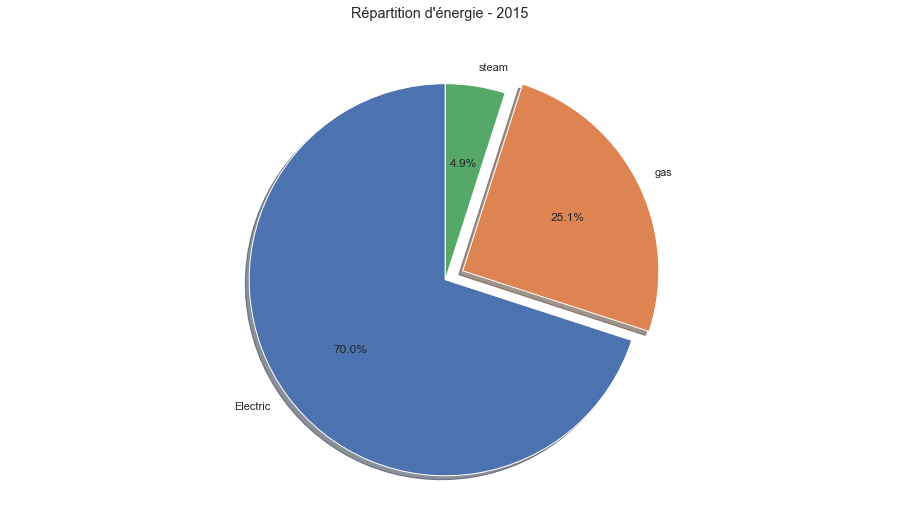

In [457]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['Electric','gas','steam']
sizes = energy_total_prop
explode = (0, 0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
fig1.set_size_inches(16, 8)
plt.suptitle(f"Répartition d'énergie - {year}")

#plt.show()

# Sauvegarde
file = int(year)
plt.savefig(f"projets\\04_seattle_building_energy\\production\\savefig\\{file}\\energy_mix_{file}.png", transparent=True)

## Corrélation - variables numériques

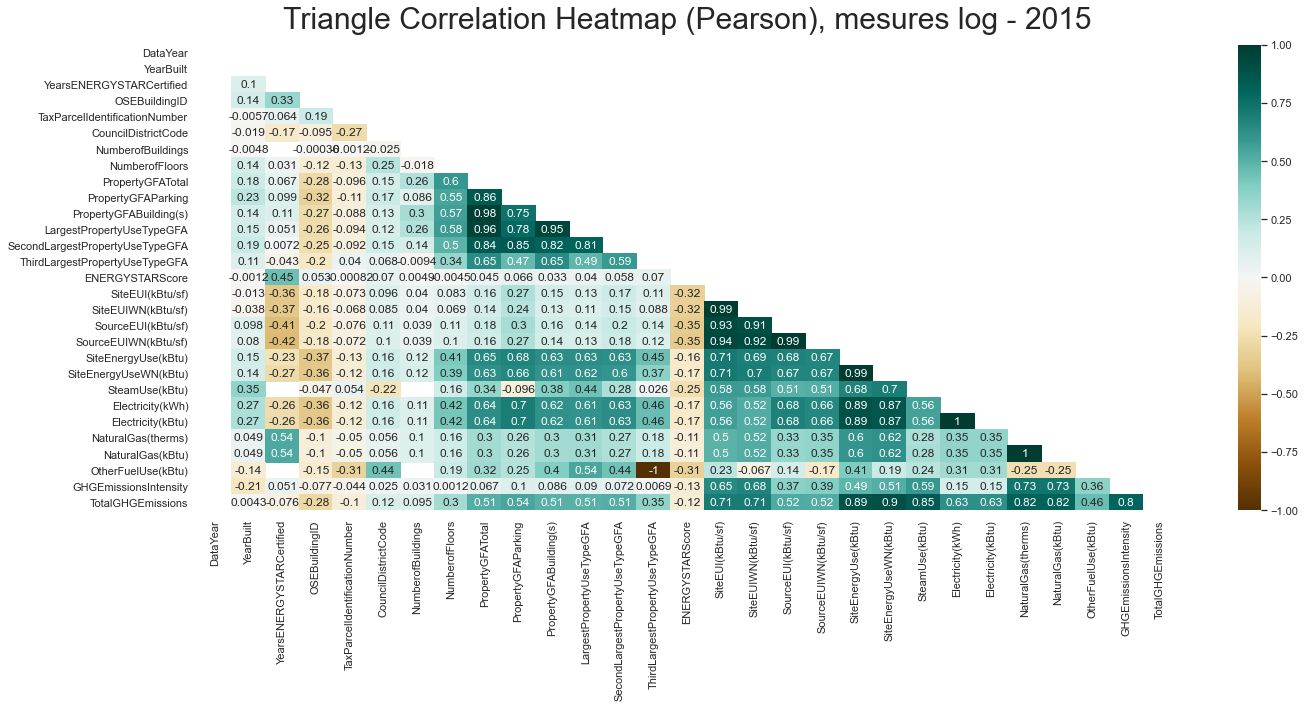

In [458]:
# Heatmap 
plt.figure(figsize=(20, 10))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(data_02[num_graph_vars].corr()))
heatmap = sns.heatmap(data_02[num_graph_vars].corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title(f'Triangle Correlation Heatmap (Pearson), mesures log - {year}', fontdict={'fontsize':30}, pad=16);
plt.tight_layout()

fig = heatmap.get_figure()

# Sauvegarde
file = int(year)
plt.savefig(f"projets\\04_seattle_building_energy\\production\\savefig\\{file}\\Heatmap_Pearson_mesures_log_{file}.png", transparent=True)

Concernant les caractéristiques:
- 'PropertyGFAParking' est corrélé avec 'PropertyGFATotal'
- 'PropertyGFABuilding(s)' est corrélé 'PropertyGFATotal'
- 'LargestPropertyUseTypeGFA' est corrélé avec 'PropertyGFATotal'
    

Concernant la consommation d'énergie:
- 'SiteEnergyUse(kBtu)' est corrélé avec 'PropertyGFATotal'


Concernant, les émissions de particules:
- 'GHGEmissions(MetricTonsCO2e)' est corrélé avec 'SiteEnergyUse(kBtu)'

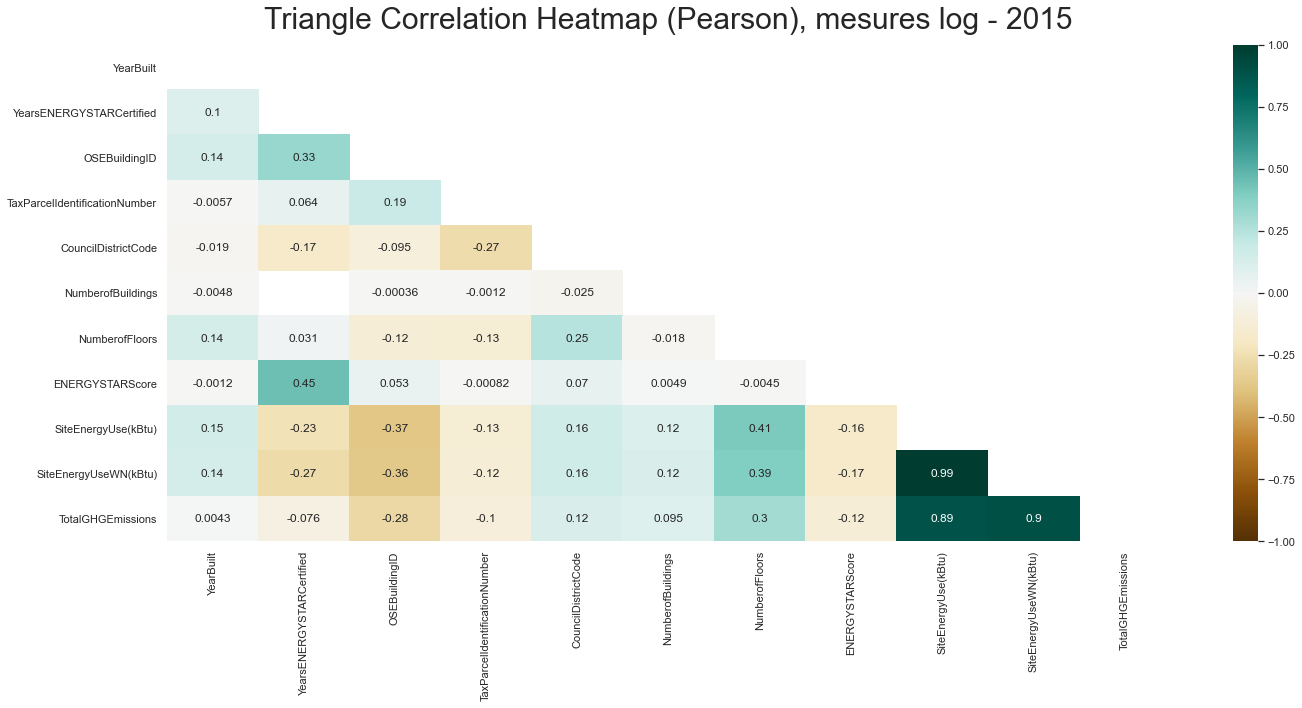

In [459]:
num_graph_vars_03 = num_graph_vars


remove_lst = ['SiteEUI(kBtu/sf)','SiteEUIWN(kBtu/sf)','SourceEUI(kBtu/sf)','SourceEUIWN(kBtu/sf)','SteamUse(kBtu)',
'Electricity(kWh)','Electricity(kBtu)','NaturalGas(therms)','NaturalGas(kBtu)','OtherFuelUse(kBtu)','GHGEmissionsIntensity',
             'PropertyGFATotal','PropertyGFAParking','PropertyGFABuilding(s)','LargestPropertyUseTypeGFA',
              'SecondLargestPropertyUseTypeGFA','ThirdLargestPropertyUseTypeGFA','DataYear']

for variable in remove_lst:
    num_graph_vars_03.remove(variable)

# Heatmap 
plt.figure(figsize=(20, 10))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(data_02[num_graph_vars_03].corr()))
heatmap = sns.heatmap(data_02[num_graph_vars_03].corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title(f'Triangle Correlation Heatmap (Pearson), mesures log - {year}', fontdict={'fontsize':30}, pad=16);
plt.tight_layout()

fig = heatmap.get_figure()

# Sauvegarde
file = int(year)
plt.savefig(f"projets\\04_seattle_building_energy\\production\\savefig\\{file}\\Heatmap_Pearson_mesures_log_{file}_03.png", transparent=True)

In [460]:
# Supprimons les caratéristiques corélées entre elles (corrélation >0.8):
correlated_features = set()

df = data_02[float_characteristics_lst]


correlation_matrix = df.corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)
correlated_features

{'LargestPropertyUseTypeGFA',
 'PropertyGFABuilding(s)',
 'PropertyGFAParking',
 'SecondLargestPropertyUseTypeGFA'}

'LargestPropertyUseTypeGFA', 'PropertyGFABuilding(s)', 'PropertyGFAParking', 'SecondLargestPropertyUseTypeGFA' peuvent être écartés

## Corrélation - variables catégorielles

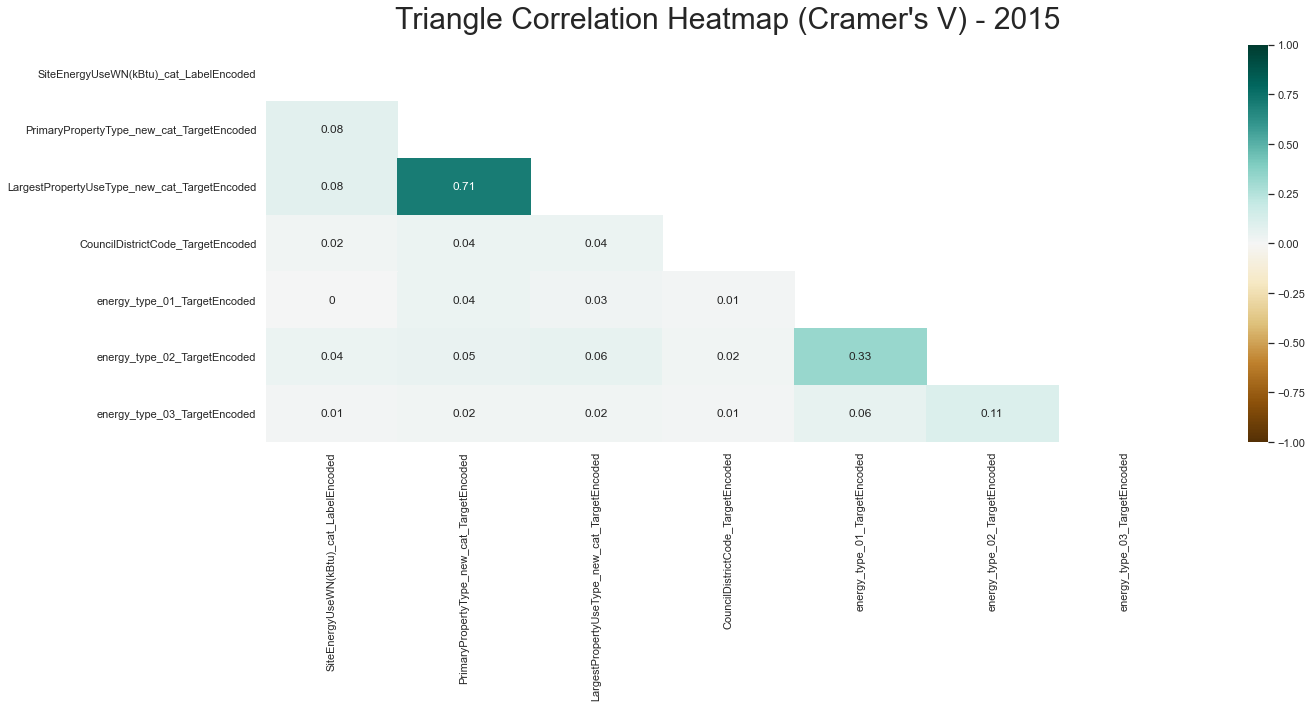

In [461]:
# Heatmap 
plt.figure(figsize=(20, 10))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(data_02_categ_vcramer))
heatmap = sns.heatmap(data_02_categ_vcramer, mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title(f"Triangle Correlation Heatmap (Cramer's V) - {year}", fontdict={'fontsize':30}, pad=16);
plt.tight_layout()

fig = heatmap.get_figure()

# Sauvegarde
file = int(year)
plt.savefig(f"projets\\04_seattle_building_energy\\production\\savefig\\{file}\\Heatmap_vcramer_{file}.png", transparent=True)

'PrimaryPropertyType_TargetEncoded' et 'LargestPropertyUseType_TargetEncoded' sont corrélées.

In [462]:
# Supprimons les caratéristiques corélées entre elles :
correlated_features = set()

for i in range(len(data_02_categ_vcramer.columns)):
    for j in range(i):
        if abs(data_02_categ_vcramer.iloc[i, j]) > 0.8:
            colname = data_02_categ_vcramer.columns[i]
            correlated_features.add(colname)
correlated_features

set()

## Analyses Bivariées

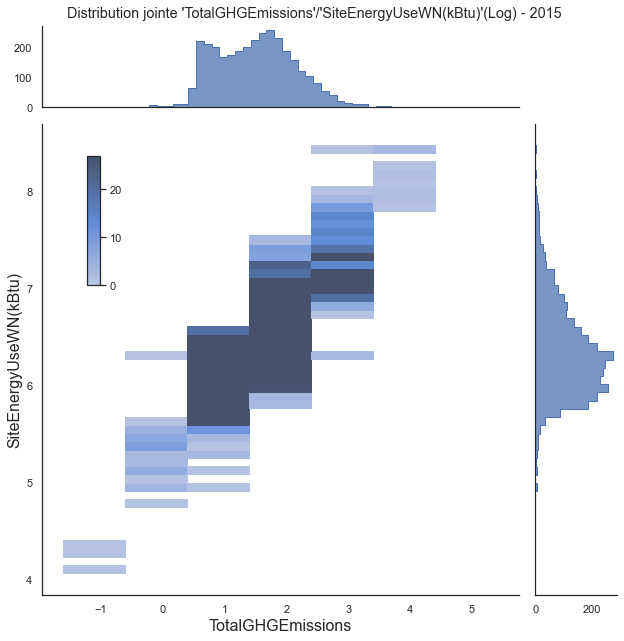

In [463]:
g = bi_joint_plot(data_02, 'TotalGHGEmissions', 'SiteEnergyUseWN(kBtu)', 9, .1)

g.fig.subplots_adjust(top=0.95) # adjust the Figure in rp
g.fig.suptitle(f"Distribution jointe 'TotalGHGEmissions'/'SiteEnergyUseWN(kBtu)'(Log) - {year}")

# Sauvegarde
file = int(year)
plt.savefig(f"projets\\04_seattle_building_energy\\production\\savefig\\{file}\\jointplot_'TotalGHGEmissions'_'SiteEnergyUseWN(kBtu)'_{file}.png", transparent=True,dpi=300)

## VARIABLES EXPLICATIVES - FILTRE

In [464]:
caracteristiques_sup = ['LargestPropertyUseTypeGFA','PropertyGFABuilding(s)',
                   'PropertyGFAParking','SecondLargestPropertyUseTypeGFA']

In [465]:
numériques_sup = float_measures_lst

# On garde les targets
numériques_sup.remove('SiteEnergyUse(kBtu)')
numériques_sup.remove('SiteEnergyUseWN(kBtu)') # celle WN aussi
numériques_sup.remove('TotalGHGEmissions')

In [466]:
columns_delete = caracteristiques_sup + numériques_sup

In [467]:
data_02.drop(columns_delete, inplace=True, axis=1)

## VARIABLES EXPLICATIVES - ENCODAGE FINAL - One-Hot Encoding

'PrimaryPropertyType_new_cat', 'LargestPropertyUseType_new_cat', 'Neighborhood' vont être encodées par hotencoding

### 'PrimaryPropertyType_new_cat'

In [468]:
data_02['PrimaryPropertyType_new_cat'].unique()

array(['Hotel/Restaurant', 'Mixed Use Property', 'Commercial centers',
       'Education', 'Office', 'Logistic/Distribution centers',
       'Other/Public places', 'Health services', 'Industry'], dtype=object)

In [469]:
data_02['LargestPropertyUseType_new_cat'].unique()

array(['Hotel/Restaurant', 'Class Missing', 'Commercial centers',
       'Education', 'Office', 'Logistic/Distribution centers', 'Industry',
       'Health services', 'Other/Public places', 'Multifamily Housing'],
      dtype=object)

In [470]:
# un preprocessing est utilisé pour labelliser de la même manière les autres variables
# pour tous les ans, en commençant par 2015
if int(year) == 2015: 
    # creating instance of one-hot-encoder
    enc_xType = OneHotEncoder()

In [471]:
xType_hierarchy = [['Multifamily Housing'],['Office'],['Education'],['Mixed Use Property'],
                   ['Logistic/Distribution centers'],['Commercial centers'],
                   ['Hotel/Restaurant'],['Health services'],['Industry'],
                   ['Other/Public places'],['Class Missing']] 
xType_hierarchy_df = pd.DataFrame(xType_hierarchy)

In [472]:
enc_xType.fit(xType_hierarchy_df)

OneHotEncoder()

In [473]:
data_02 = vector_encoding_transform_with_merge(data_02, 'PrimaryPropertyType_new_cat', 'OSEBuildingID', enc_xType)

Cette méthode élimine le problème de hiérarchie mais apporte plus de variables. 

### 'CouncilDistrictCode'

In [474]:
data_02['CouncilDistrictCode'].unique()

array([2, 7, 3, 1, 6, 5, 4], dtype=int64)

In [475]:
# Vérification pertinence du code district par rapport à l'arrondissement
pd.crosstab(data['Neighborhood'], data['CouncilDistrictCode'])

CouncilDistrictCode,1,2,3,4,5,6,7
Neighborhood,,,,,,,
BALLARD,0,0,0,0,0,126,0
CENTRAL,0,0,129,0,0,0,0
DELRIDGE,85,0,0,0,0,0,0
DOWNTOWN,0,73,11,0,0,0,464
EAST,0,1,401,0,0,0,31
GREATER DUWAMISH,30,331,3,0,0,0,0
LAKE UNION,0,0,14,96,0,38,96
MAGNOLIA / QUEEN ANNE,0,0,0,0,0,0,408
NORTH,0,0,0,3,184,0,0


In [476]:
# un preprocessing est utilisé pour labelliser de la même manière les autres variables
# pour tous les ans, en commençant par 2015
if int(year) == 2015: 
    # creating instance of one-hot-encoder
    enc_district = OneHotEncoder()

In [477]:
enc_district.fit(district_df)

OneHotEncoder()

In [478]:
data_02 = vector_encoding_transform_with_merge(data_02, 'CouncilDistrictCode', 'OSEBuildingID', enc_district)

### 'energy_type_03'

In [479]:
data_02['energy_type_03'].unique()

array(['Class Missing', 'gas', 'electricity', 'steam'], dtype=object)

In [480]:
energy_df = pd.DataFrame(['Class Missing', 'electricity','gas','steam'], columns=['energy_type_03'])
energy_df['energy_type_03'] = energy_df['energy_type_03'].astype('category')

In [481]:
energy_df

,energy_type_03
0,Class Missing
1,electricity
2,gas
3,steam


In [482]:
# un preprocessing est utilisé pour labelliser de la même manière les autres variables
# pour tous les ans, en commençant par 2015
if int(year) == 2015: 
    # creating instance of one-hot-encoder
    enc_energy = OneHotEncoder()

In [483]:
enc_energy.fit(energy_df)

OneHotEncoder()

### 'energy_type_02'

In [484]:
data_02 = vector_encoding_transform_with_merge(data_02, 'energy_type_02', 'OSEBuildingID', enc_energy)

### 'energy_type_01'

In [485]:
column_data_rate(data_02)

OSEBuildingID                                                  1.000000
DataYear                                                       1.000000
BuildingType                                                   1.000000
PrimaryPropertyType                                            1.000000
PropertyName                                                   1.000000
TaxParcelIdentificationNumber                                  0.998463
Location                                                       1.000000
CouncilDistrictCode                                            1.000000
Neighborhood                                                   1.000000
YearBuilt                                                      1.000000
NumberofBuildings                                              1.000000
NumberofFloors                                                 1.000000
PropertyGFATotal                                               1.000000
ListOfAllPropertyUseTypes                                      0

# EXPORT DATASET MODIFIE - CSV

Variables catégorisées, encodées ou créées:

- 'SiteEnergyUse(kBtu)_cat_LabelEncoded'

- 'PrimaryPropertyType_new_cat_TargetEncoded'
- 'PrimaryPropertyType_new_cat' -> One-hot encoding

- 'LargestPropertyUseType_new_cat_TargetEncoded'

- 'CouncilDistrictCode_TargetEncoded'
- 'CouncilDistrictCode' -> One-hot encoding

- 'energy_type_01' -> Créé
- 'energy_type_01_LabelEncoded' 
- 'energy_type_01' -> One-hot encoding

- 'energy_type_02' -> Créé
- 'energy_type_01_LabelEncoded'
- 'energy_type_02' -> One-hot encoding

- 'energy_type_03' -> Créé
- 'energy_type_01_LabelEncoded'
- 'energy_type_03' -> One-hot encoding



In [846]:
## Enregistrement de l'échantillon au format csv 
file = int(year)

returnValue = data_02.to_csv(f'projets\\04_seattle_building_energy\\production\\data_seattle_building_energy_modified_{file}.csv',sep = ',', index=False)
print(returnValue)

None
